In [1]:
import pickle

file_name_x = 'X_trainingAll1.p'
file_name_y = 'Y_trainingAll1.p'
total_data_x = pickle.load(open(file_name_x, "rb"))
total_data_y = pickle.load(open(file_name_y, "rb"))

In [2]:
#the first step is to clean the data structure a little bit
#we are turning the datastructure from a pickle file to two matrices
#There is one matrix for training input data and one matrix for training label
#each row is an example and each column is a feature
import numpy as np

features_list = [feature for feature in total_data_x]
targets_list = [feature for feature in total_data_y]
Numsamples = len(total_data_x[features_list[0]])
Numfeatures = len(total_data_x)
Numtargets = len(total_data_y)

new_targets_list=[]

x_data = np.zeros((Numsamples, Numfeatures))
y_data = np.zeros((Numsamples, Numtargets))

for j in range(len(features_list)):
    for i in range(0,Numsamples):
        x_data[i, j] = total_data_x[features_list[j]][i][0]

for j in range(len(targets_list)):
    if targets_list[j]=='x' or targets_list[j]=='px' or targets_list[j]=='y' or targets_list[j]=='py'\
    or targets_list[j]=='qb'or targets_list[j]=='twiss_x_gamma' or targets_list[j]=='twiss_y_gamma':
        continue
    else:
        new_targets_list.append(targets_list[j])
        for i in range(0,Numsamples):
            y_data[i, j] = total_data_y[targets_list[j]][i][0]
            
total_data_x = x_data
total_data_y = y_data

In [3]:
total_data_x.shape,total_data_y.shape

((1031, 6), (1031, 12))

In [4]:
file_name_x = 'X_trainingAll2.p'
file_name_y = 'Y_trainingAll2.p'
total_data_x2 = pickle.load(open(file_name_x, "rb"))
total_data_y2 = pickle.load(open(file_name_y, "rb"))

In [5]:
#just transforming the data structure but for the second batch of GPT generated training data

features_list = [feature for feature in total_data_x2]
targets_list = [feature for feature in total_data_y2]
Numsamples = len(total_data_x2[features_list[0]])
Numfeatures = len(total_data_x2)
Numtargets = len(total_data_y2)

new_targets_list=[]

x_data = np.zeros((Numsamples, Numfeatures))
y_data = np.zeros((Numsamples, Numtargets))

for j in range(len(features_list)):
    for i in range(0,Numsamples):
        x_data[i, j] = total_data_x2[features_list[j]][i][0]

for j in range(len(targets_list)):
    if targets_list[j]=='x' or targets_list[j]=='px' or targets_list[j]=='y' or targets_list[j]=='py'\
    or targets_list[j]=='qb'or targets_list[j]=='twiss_x_gamma' or targets_list[j]=='twiss_y_gamma':
        continue
    else:
        new_targets_list.append(targets_list[j])
        for i in range(0,Numsamples):
            y_data[i, j] = total_data_y2[targets_list[j]][i][0]
            
total_data_x2 = x_data
total_data_y2 = y_data

In [6]:
total_data_x2.shape,total_data_y2.shape

((2069, 6), (2069, 12))

In [7]:
file_name_x = 'X_trainingAll3.p'
file_name_y = 'Y_trainingAll3.p'
total_data_x3 = pickle.load(open(file_name_x, "rb"))
total_data_y3 = pickle.load(open(file_name_y, "rb"))

In [8]:
#just transforming the data structure but for the third batch of GPT generated training data


features_list = [feature for feature in total_data_x3]
targets_list = [feature for feature in total_data_y3]
Numsamples = len(total_data_x3[features_list[0]])
Numfeatures = len(total_data_x3)
Numtargets = len(total_data_y3)

new_targets_list=[]

x_data = np.zeros((Numsamples, Numfeatures))
y_data = np.zeros((Numsamples, Numtargets))

for j in range(len(features_list)):
    for i in range(0,Numsamples):
        x_data[i, j] = total_data_x3[features_list[j]][i][0]

for j in range(len(targets_list)):
    if targets_list[j]=='x' or targets_list[j]=='px' or targets_list[j]=='y' or targets_list[j]=='py'\
    or targets_list[j]=='qb'or targets_list[j]=='twiss_x_gamma' or targets_list[j]=='twiss_y_gamma':
        continue
    else:
        new_targets_list.append(targets_list[j])
        for i in range(0,Numsamples):
            y_data[i, j] = total_data_y3[targets_list[j]][i][0]
            
total_data_x3 = x_data
total_data_y3 = y_data

In [9]:
total_data_x3.shape,total_data_y3.shape

((1061, 6), (1061, 12))

In [10]:
targets_list = new_targets_list

In [11]:
#so, we don't include px,x,y,py, and twiss gamma
total_data_y = total_data_y[:,~np.all(total_data_y == 0, axis=0)]
total_data_y2 = total_data_y2[:,~np.all(total_data_y2 == 0, axis=0)]
#total_data_y3 = total_data_y3[:,~np.all(total_data_y3 == 0, axis=0)]

In [12]:
#just combining data into one large file
total_data_y=np.concatenate((total_data_y,total_data_y2),axis=0)
total_data_x=np.concatenate((total_data_x,total_data_x2),axis=0)

#total_data_y=np.concatenate((total_data_y,total_data_y3),axis=0)
#total_data_x=np.concatenate((total_data_x,total_data_x3),axis=0)

In [13]:
print('the max emittance before cleaning data is',max(total_data_y[:,0]))
print('the min emittance before cleaning data is',min(total_data_y[:,0]))

the max emittance before cleaning data is 2.1496871484843227
the min emittance before cleaning data is 0.1631729029301908


In [14]:
for index in range(0,len(features_list)):
    print('the feature is',features_list[index])
    print(max(total_data_x[:,index]))
    print(min(total_data_x[:,index]))
    print(' ')

the feature is sol_1_current
-2.500271284796115
-3.4998998372817263
 
the feature is sol_2_current
2.7997226527984225
1.8002290019167755
 
the feature is A3Quad_1_current
-6.000001333817787
-7.999294097181149
 
the feature is A3Quad_2_current
6.499712805247474
4.500395119388785
 
the feature is A3Quad_3_current
4.599514018514804
2.6000409515918976
 
the feature is A3Quad_4_current
-7.300949564186164
-9.299995437108834
 


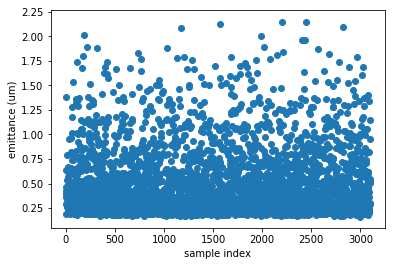

In [15]:
#first, let's plot all the emittance and make sure this is sensible
import matplotlib.pyplot as plt
x_axis=[]
for index in range(0,total_data_x.shape[0]):
    x_axis.append(index)
plt.scatter(x_axis,total_data_y[:,0])
plt.xlabel('sample index')
plt.ylabel('emittance (um)')
plt.show()

In [16]:
max_allowed_emittance = 1

In [17]:
#I can clean up the data a little bit

for features_index in range(0,len(targets_list)):
    keep_index = []
    mean = np.mean(total_data_y[:, features_index])
    std = np.std(total_data_y[:, features_index])
    
    for index in range(0, total_data_y.shape[0]):
        if targets_list[features_index]=='max_enxy':
            if total_data_y[index,features_index]<max_allowed_emittance:

                keep_index.append(index)
            
            
        else:    
            keep_index.append(index)
    
    
    total_data_x = total_data_x[keep_index, :]
    total_data_y = total_data_y[keep_index, :]

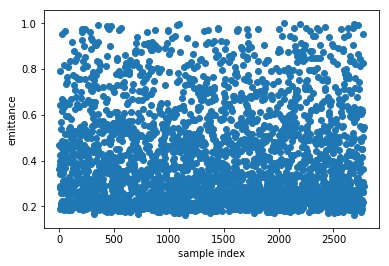

In [18]:
#now,let's check the emittance is below 1um
#first, let's plot all the emittance and make sure this is sensible
import matplotlib.pyplot as plt
x_axis=[]
for index in range(0,total_data_x.shape[0]):
    x_axis.append(index)
plt.scatter(x_axis,total_data_y[:,0])
plt.xlabel('sample index')
plt.ylabel('emittance')
plt.show()

In [19]:
features_list

['sol_1_current',
 'sol_2_current',
 'A3Quad_1_current',
 'A3Quad_2_current',
 'A3Quad_3_current',
 'A3Quad_4_current']

In [20]:
#now, I am going to throw emittance away as an output because we don't need to use emittance
total_data_y=total_data_y[:,1::]

In [21]:
total_data_x.shape,total_data_y.shape

((2777, 6), (2777, 4))

In [22]:
#We now want to scale our data so that it goes from [-1,1] since we will use tanh activation function

scaled_total_data_x=((total_data_x-np.min(total_data_x,axis=0))*(2)/(np.max(total_data_x,axis=0)-np.min(total_data_x,axis=0)))-1
scaled_total_data_y=((total_data_y-np.min(total_data_y,axis=0))*(2)/(np.max(total_data_y,axis=0)-np.min(total_data_y,axis=0)))-1
print('min for Y, X: ',np.min(scaled_total_data_y,axis=0), np.min(scaled_total_data_x,axis=0))
print('max for Y, X: ',np.max(scaled_total_data_y,axis=0), np.max(scaled_total_data_x,axis=0))

min for Y, X:  [-1. -1. -1. -1.] [-1. -1. -1. -1. -1. -1.]
max for Y, X:  [1. 1. 1. 1.] [1. 1. 1. 1. 1. 1.]


In [46]:
class per_fold_object():
    def __init__(self,training_set,validation_set):
        self.train_index=training_set
        self.val_index=validation_set

In [47]:
ints = np.random.permutation(np.arange(0,total_data_x.shape[0],1,dtype=int))

fold_list=[]

k_fold=8
percent=1.0/k_fold
for index in range(0,k_fold):
    begin_index=np.int(total_data_x.shape[0]*percent*index) 
    finish_index=np.int(total_data_x.shape[0]*percent*(index+1)) 

    ints_test = ints[begin_index : finish_index]
    
    ints_train=[]
    for i in range(0,total_data_x.shape[0]):
        if not i in ints_test:
            ints_train.append(i)
    ints_train=np.asarray(ints_train)
    
    fold_list.append(per_fold_object(ints_train,ints_test))

In [48]:

seed_value= 0
import os
os.environ['PYTHONHASHSEED']=str(seed_value)

import numpy as np
np.random.seed(seed_value)

import tensorflow as tf
tf.set_random_seed(seed_value)

from keras import backend as K
session_conf = tf.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
K.set_session(sess)

In [49]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.models import load_model
from keras.regularizers import l2

In [50]:
model_1= Sequential()
model_1.add(Dense(64, activation='tanh', input_dim=len(features_list),activity_regularizer=l2(0.00)))
model_1.add(Dense(64, activation='tanh',activity_regularizer=l2(0.00)))
model_1.add(Dense(32, activation='tanh',activity_regularizer=l2(0.00)))
model_1.add(Dense(32, activation='tanh',activity_regularizer=l2(0.00)))
model_1.add(Dense(16, activation='tanh',activity_regularizer=l2(0.00)))
model_1.add(Dense(16, activation='tanh',activity_regularizer=l2(0.00)))
model_1.add(Dense(4, activation='linear',activity_regularizer=l2(0.00)))
model_1.compile(loss='mse',
                optimizer='adam',
                metrics=['mean_absolute_error', 'mean_squared_error'])

In [51]:
model_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 64)                448       
_________________________________________________________________
dense_9 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_10 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_11 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_12 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_13 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_14 (Dense)             (None, 4)                 68        
Total para

In [52]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=200)

In [53]:
x_val = scaled_total_data_x[fold_list[index].val_index]
y_val = scaled_total_data_y[fold_list[index].val_index]


history = model_1.fit(scaled_total_data_x[fold_list[index].train_index], scaled_total_data_y[fold_list[index].train_index],
                      validation_data=(x_val, y_val),
                      epochs=10000,
                      verbose=2,
                      callbacks=[early_stop])

Train on 2429 samples, validate on 348 samples
Epoch 1/10000
 - 1s - loss: 0.1167 - mean_absolute_error: 0.2566 - mean_squared_error: 0.1167 - val_loss: 0.0618 - val_mean_absolute_error: 0.1882 - val_mean_squared_error: 0.0618
Epoch 2/10000
 - 0s - loss: 0.0689 - mean_absolute_error: 0.1979 - mean_squared_error: 0.0689 - val_loss: 0.0586 - val_mean_absolute_error: 0.1839 - val_mean_squared_error: 0.0586
Epoch 3/10000
 - 0s - loss: 0.0653 - mean_absolute_error: 0.1912 - mean_squared_error: 0.0653 - val_loss: 0.0605 - val_mean_absolute_error: 0.1899 - val_mean_squared_error: 0.0605
Epoch 4/10000
 - 0s - loss: 0.0628 - mean_absolute_error: 0.1871 - mean_squared_error: 0.0628 - val_loss: 0.0547 - val_mean_absolute_error: 0.1733 - val_mean_squared_error: 0.0547
Epoch 5/10000
 - 0s - loss: 0.0569 - mean_absolute_error: 0.1771 - mean_squared_error: 0.0569 - val_loss: 0.0520 - val_mean_absolute_error: 0.1690 - val_mean_squared_error: 0.0520
Epoch 6/10000
 - 0s - loss: 0.0474 - mean_absolute_er

 - 0s - loss: 0.0026 - mean_absolute_error: 0.0384 - mean_squared_error: 0.0026 - val_loss: 0.0034 - val_mean_absolute_error: 0.0446 - val_mean_squared_error: 0.0034
Epoch 47/10000
 - 0s - loss: 0.0027 - mean_absolute_error: 0.0387 - mean_squared_error: 0.0027 - val_loss: 0.0031 - val_mean_absolute_error: 0.0422 - val_mean_squared_error: 0.0031
Epoch 48/10000
 - 0s - loss: 0.0025 - mean_absolute_error: 0.0371 - mean_squared_error: 0.0025 - val_loss: 0.0028 - val_mean_absolute_error: 0.0383 - val_mean_squared_error: 0.0028
Epoch 49/10000
 - 0s - loss: 0.0024 - mean_absolute_error: 0.0361 - mean_squared_error: 0.0024 - val_loss: 0.0026 - val_mean_absolute_error: 0.0368 - val_mean_squared_error: 0.0026
Epoch 50/10000
 - 0s - loss: 0.0023 - mean_absolute_error: 0.0361 - mean_squared_error: 0.0023 - val_loss: 0.0024 - val_mean_absolute_error: 0.0357 - val_mean_squared_error: 0.0024
Epoch 51/10000
 - 0s - loss: 0.0023 - mean_absolute_error: 0.0358 - mean_squared_error: 0.0023 - val_loss: 0.0

Epoch 92/10000
 - 0s - loss: 0.0013 - mean_absolute_error: 0.0272 - mean_squared_error: 0.0013 - val_loss: 0.0013 - val_mean_absolute_error: 0.0262 - val_mean_squared_error: 0.0013
Epoch 93/10000
 - 0s - loss: 0.0012 - mean_absolute_error: 0.0254 - mean_squared_error: 0.0012 - val_loss: 0.0015 - val_mean_absolute_error: 0.0279 - val_mean_squared_error: 0.0015
Epoch 94/10000
 - 0s - loss: 0.0011 - mean_absolute_error: 0.0253 - mean_squared_error: 0.0011 - val_loss: 0.0016 - val_mean_absolute_error: 0.0295 - val_mean_squared_error: 0.0016
Epoch 95/10000
 - 0s - loss: 0.0013 - mean_absolute_error: 0.0267 - mean_squared_error: 0.0013 - val_loss: 0.0016 - val_mean_absolute_error: 0.0291 - val_mean_squared_error: 0.0016
Epoch 96/10000
 - 0s - loss: 0.0012 - mean_absolute_error: 0.0260 - mean_squared_error: 0.0012 - val_loss: 0.0014 - val_mean_absolute_error: 0.0271 - val_mean_squared_error: 0.0014
Epoch 97/10000
 - 0s - loss: 0.0013 - mean_absolute_error: 0.0270 - mean_squared_error: 0.0013 

Epoch 137/10000
 - 0s - loss: 9.2854e-04 - mean_absolute_error: 0.0228 - mean_squared_error: 9.2854e-04 - val_loss: 0.0013 - val_mean_absolute_error: 0.0271 - val_mean_squared_error: 0.0013
Epoch 138/10000
 - 0s - loss: 9.2830e-04 - mean_absolute_error: 0.0228 - mean_squared_error: 9.2830e-04 - val_loss: 9.0004e-04 - val_mean_absolute_error: 0.0216 - val_mean_squared_error: 9.0004e-04
Epoch 139/10000
 - 0s - loss: 9.1547e-04 - mean_absolute_error: 0.0225 - mean_squared_error: 9.1547e-04 - val_loss: 9.7587e-04 - val_mean_absolute_error: 0.0236 - val_mean_squared_error: 9.7587e-04
Epoch 140/10000
 - 0s - loss: 7.9809e-04 - mean_absolute_error: 0.0212 - mean_squared_error: 7.9809e-04 - val_loss: 8.8619e-04 - val_mean_absolute_error: 0.0224 - val_mean_squared_error: 8.8619e-04
Epoch 141/10000
 - 0s - loss: 8.9656e-04 - mean_absolute_error: 0.0226 - mean_squared_error: 8.9656e-04 - val_loss: 0.0011 - val_mean_absolute_error: 0.0235 - val_mean_squared_error: 0.0011
Epoch 142/10000
 - 0s - lo

Epoch 179/10000
 - 0s - loss: 8.4730e-04 - mean_absolute_error: 0.0219 - mean_squared_error: 8.4730e-04 - val_loss: 9.7410e-04 - val_mean_absolute_error: 0.0234 - val_mean_squared_error: 9.7410e-04
Epoch 180/10000
 - 0s - loss: 6.2318e-04 - mean_absolute_error: 0.0186 - mean_squared_error: 6.2318e-04 - val_loss: 7.3194e-04 - val_mean_absolute_error: 0.0190 - val_mean_squared_error: 7.3194e-04
Epoch 181/10000
 - 0s - loss: 6.2471e-04 - mean_absolute_error: 0.0188 - mean_squared_error: 6.2471e-04 - val_loss: 9.2508e-04 - val_mean_absolute_error: 0.0224 - val_mean_squared_error: 9.2508e-04
Epoch 182/10000
 - 0s - loss: 6.2763e-04 - mean_absolute_error: 0.0188 - mean_squared_error: 6.2763e-04 - val_loss: 8.6380e-04 - val_mean_absolute_error: 0.0210 - val_mean_squared_error: 8.6380e-04
Epoch 183/10000
 - 0s - loss: 8.3875e-04 - mean_absolute_error: 0.0217 - mean_squared_error: 8.3875e-04 - val_loss: 0.0012 - val_mean_absolute_error: 0.0244 - val_mean_squared_error: 0.0012
Epoch 184/10000
 -

Epoch 221/10000
 - 0s - loss: 5.0793e-04 - mean_absolute_error: 0.0171 - mean_squared_error: 5.0793e-04 - val_loss: 5.6917e-04 - val_mean_absolute_error: 0.0167 - val_mean_squared_error: 5.6917e-04
Epoch 222/10000
 - 0s - loss: 5.3577e-04 - mean_absolute_error: 0.0173 - mean_squared_error: 5.3577e-04 - val_loss: 8.8500e-04 - val_mean_absolute_error: 0.0215 - val_mean_squared_error: 8.8500e-04
Epoch 223/10000
 - 0s - loss: 5.5524e-04 - mean_absolute_error: 0.0177 - mean_squared_error: 5.5524e-04 - val_loss: 6.2133e-04 - val_mean_absolute_error: 0.0180 - val_mean_squared_error: 6.2133e-04
Epoch 224/10000
 - 0s - loss: 6.4884e-04 - mean_absolute_error: 0.0191 - mean_squared_error: 6.4884e-04 - val_loss: 8.5556e-04 - val_mean_absolute_error: 0.0205 - val_mean_squared_error: 8.5556e-04
Epoch 225/10000
 - 0s - loss: 5.2657e-04 - mean_absolute_error: 0.0172 - mean_squared_error: 5.2657e-04 - val_loss: 6.1134e-04 - val_mean_absolute_error: 0.0171 - val_mean_squared_error: 6.1134e-04
Epoch 226/

Epoch 263/10000
 - 0s - loss: 5.4980e-04 - mean_absolute_error: 0.0175 - mean_squared_error: 5.4980e-04 - val_loss: 5.8358e-04 - val_mean_absolute_error: 0.0171 - val_mean_squared_error: 5.8358e-04
Epoch 264/10000
 - 0s - loss: 4.8676e-04 - mean_absolute_error: 0.0167 - mean_squared_error: 4.8676e-04 - val_loss: 6.3482e-04 - val_mean_absolute_error: 0.0186 - val_mean_squared_error: 6.3482e-04
Epoch 265/10000
 - 0s - loss: 4.5445e-04 - mean_absolute_error: 0.0160 - mean_squared_error: 4.5445e-04 - val_loss: 6.6590e-04 - val_mean_absolute_error: 0.0191 - val_mean_squared_error: 6.6590e-04
Epoch 266/10000
 - 0s - loss: 4.7311e-04 - mean_absolute_error: 0.0164 - mean_squared_error: 4.7311e-04 - val_loss: 5.8929e-04 - val_mean_absolute_error: 0.0167 - val_mean_squared_error: 5.8929e-04
Epoch 267/10000
 - 0s - loss: 5.0772e-04 - mean_absolute_error: 0.0168 - mean_squared_error: 5.0772e-04 - val_loss: 7.4608e-04 - val_mean_absolute_error: 0.0197 - val_mean_squared_error: 7.4608e-04
Epoch 268/

Epoch 305/10000
 - 0s - loss: 3.5667e-04 - mean_absolute_error: 0.0142 - mean_squared_error: 3.5667e-04 - val_loss: 6.1568e-04 - val_mean_absolute_error: 0.0173 - val_mean_squared_error: 6.1568e-04
Epoch 306/10000
 - 0s - loss: 4.2872e-04 - mean_absolute_error: 0.0156 - mean_squared_error: 4.2872e-04 - val_loss: 6.4213e-04 - val_mean_absolute_error: 0.0177 - val_mean_squared_error: 6.4213e-04
Epoch 307/10000
 - 0s - loss: 3.7667e-04 - mean_absolute_error: 0.0146 - mean_squared_error: 3.7667e-04 - val_loss: 5.4694e-04 - val_mean_absolute_error: 0.0163 - val_mean_squared_error: 5.4694e-04
Epoch 308/10000
 - 0s - loss: 3.5600e-04 - mean_absolute_error: 0.0142 - mean_squared_error: 3.5600e-04 - val_loss: 4.6380e-04 - val_mean_absolute_error: 0.0151 - val_mean_squared_error: 4.6380e-04
Epoch 309/10000
 - 0s - loss: 5.8948e-04 - mean_absolute_error: 0.0180 - mean_squared_error: 5.8948e-04 - val_loss: 9.7804e-04 - val_mean_absolute_error: 0.0236 - val_mean_squared_error: 9.7804e-04
Epoch 310/

Epoch 347/10000
 - 0s - loss: 4.0436e-04 - mean_absolute_error: 0.0151 - mean_squared_error: 4.0436e-04 - val_loss: 6.0818e-04 - val_mean_absolute_error: 0.0178 - val_mean_squared_error: 6.0818e-04
Epoch 348/10000
 - 0s - loss: 4.7822e-04 - mean_absolute_error: 0.0163 - mean_squared_error: 4.7822e-04 - val_loss: 5.6613e-04 - val_mean_absolute_error: 0.0171 - val_mean_squared_error: 5.6613e-04
Epoch 349/10000
 - 0s - loss: 4.5452e-04 - mean_absolute_error: 0.0160 - mean_squared_error: 4.5452e-04 - val_loss: 6.6978e-04 - val_mean_absolute_error: 0.0188 - val_mean_squared_error: 6.6978e-04
Epoch 350/10000
 - 0s - loss: 5.2220e-04 - mean_absolute_error: 0.0171 - mean_squared_error: 5.2220e-04 - val_loss: 5.8753e-04 - val_mean_absolute_error: 0.0177 - val_mean_squared_error: 5.8753e-04
Epoch 351/10000
 - 0s - loss: 5.3045e-04 - mean_absolute_error: 0.0173 - mean_squared_error: 5.3045e-04 - val_loss: 8.2046e-04 - val_mean_absolute_error: 0.0215 - val_mean_squared_error: 8.2046e-04
Epoch 352/

Epoch 389/10000
 - 0s - loss: 4.4694e-04 - mean_absolute_error: 0.0159 - mean_squared_error: 4.4694e-04 - val_loss: 6.5506e-04 - val_mean_absolute_error: 0.0179 - val_mean_squared_error: 6.5506e-04
Epoch 390/10000
 - 0s - loss: 4.2580e-04 - mean_absolute_error: 0.0154 - mean_squared_error: 4.2580e-04 - val_loss: 6.0283e-04 - val_mean_absolute_error: 0.0172 - val_mean_squared_error: 6.0283e-04
Epoch 391/10000
 - 0s - loss: 3.9890e-04 - mean_absolute_error: 0.0151 - mean_squared_error: 3.9890e-04 - val_loss: 6.2609e-04 - val_mean_absolute_error: 0.0181 - val_mean_squared_error: 6.2609e-04
Epoch 392/10000
 - 0s - loss: 4.1709e-04 - mean_absolute_error: 0.0152 - mean_squared_error: 4.1709e-04 - val_loss: 4.8581e-04 - val_mean_absolute_error: 0.0159 - val_mean_squared_error: 4.8581e-04
Epoch 393/10000
 - 0s - loss: 4.2753e-04 - mean_absolute_error: 0.0155 - mean_squared_error: 4.2753e-04 - val_loss: 6.0842e-04 - val_mean_absolute_error: 0.0179 - val_mean_squared_error: 6.0842e-04
Epoch 394/

Epoch 431/10000
 - 0s - loss: 5.1626e-04 - mean_absolute_error: 0.0168 - mean_squared_error: 5.1626e-04 - val_loss: 5.0803e-04 - val_mean_absolute_error: 0.0160 - val_mean_squared_error: 5.0803e-04
Epoch 432/10000
 - 0s - loss: 3.7190e-04 - mean_absolute_error: 0.0145 - mean_squared_error: 3.7190e-04 - val_loss: 4.6885e-04 - val_mean_absolute_error: 0.0159 - val_mean_squared_error: 4.6885e-04
Epoch 433/10000
 - 0s - loss: 3.6840e-04 - mean_absolute_error: 0.0144 - mean_squared_error: 3.6840e-04 - val_loss: 4.6473e-04 - val_mean_absolute_error: 0.0149 - val_mean_squared_error: 4.6473e-04
Epoch 434/10000
 - 0s - loss: 4.5821e-04 - mean_absolute_error: 0.0157 - mean_squared_error: 4.5821e-04 - val_loss: 6.8161e-04 - val_mean_absolute_error: 0.0188 - val_mean_squared_error: 6.8161e-04
Epoch 435/10000
 - 0s - loss: 4.0763e-04 - mean_absolute_error: 0.0150 - mean_squared_error: 4.0763e-04 - val_loss: 4.6263e-04 - val_mean_absolute_error: 0.0151 - val_mean_squared_error: 4.6263e-04
Epoch 436/

Epoch 473/10000
 - 0s - loss: 3.3681e-04 - mean_absolute_error: 0.0137 - mean_squared_error: 3.3681e-04 - val_loss: 6.7626e-04 - val_mean_absolute_error: 0.0187 - val_mean_squared_error: 6.7626e-04
Epoch 474/10000
 - 0s - loss: 3.8151e-04 - mean_absolute_error: 0.0143 - mean_squared_error: 3.8151e-04 - val_loss: 6.4498e-04 - val_mean_absolute_error: 0.0185 - val_mean_squared_error: 6.4498e-04
Epoch 475/10000
 - 0s - loss: 4.1096e-04 - mean_absolute_error: 0.0152 - mean_squared_error: 4.1096e-04 - val_loss: 6.0823e-04 - val_mean_absolute_error: 0.0171 - val_mean_squared_error: 6.0823e-04
Epoch 476/10000
 - 0s - loss: 3.7907e-04 - mean_absolute_error: 0.0145 - mean_squared_error: 3.7907e-04 - val_loss: 5.3181e-04 - val_mean_absolute_error: 0.0158 - val_mean_squared_error: 5.3181e-04
Epoch 477/10000
 - 0s - loss: 3.6568e-04 - mean_absolute_error: 0.0140 - mean_squared_error: 3.6568e-04 - val_loss: 5.9387e-04 - val_mean_absolute_error: 0.0181 - val_mean_squared_error: 5.9387e-04
Epoch 478/

Epoch 515/10000
 - 0s - loss: 3.1097e-04 - mean_absolute_error: 0.0131 - mean_squared_error: 3.1097e-04 - val_loss: 5.2482e-04 - val_mean_absolute_error: 0.0155 - val_mean_squared_error: 5.2482e-04
Epoch 516/10000
 - 0s - loss: 3.2851e-04 - mean_absolute_error: 0.0135 - mean_squared_error: 3.2851e-04 - val_loss: 5.2513e-04 - val_mean_absolute_error: 0.0163 - val_mean_squared_error: 5.2513e-04
Epoch 517/10000
 - 0s - loss: 3.1052e-04 - mean_absolute_error: 0.0131 - mean_squared_error: 3.1052e-04 - val_loss: 4.2739e-04 - val_mean_absolute_error: 0.0148 - val_mean_squared_error: 4.2739e-04
Epoch 518/10000
 - 0s - loss: 3.1109e-04 - mean_absolute_error: 0.0132 - mean_squared_error: 3.1109e-04 - val_loss: 4.3800e-04 - val_mean_absolute_error: 0.0144 - val_mean_squared_error: 4.3800e-04
Epoch 519/10000
 - 0s - loss: 3.2085e-04 - mean_absolute_error: 0.0134 - mean_squared_error: 3.2085e-04 - val_loss: 4.5354e-04 - val_mean_absolute_error: 0.0155 - val_mean_squared_error: 4.5354e-04
Epoch 520/

Epoch 557/10000
 - 0s - loss: 2.8217e-04 - mean_absolute_error: 0.0127 - mean_squared_error: 2.8217e-04 - val_loss: 4.0358e-04 - val_mean_absolute_error: 0.0135 - val_mean_squared_error: 4.0358e-04
Epoch 558/10000
 - 0s - loss: 3.0390e-04 - mean_absolute_error: 0.0131 - mean_squared_error: 3.0390e-04 - val_loss: 5.0517e-04 - val_mean_absolute_error: 0.0161 - val_mean_squared_error: 5.0517e-04
Epoch 559/10000
 - 0s - loss: 3.5039e-04 - mean_absolute_error: 0.0139 - mean_squared_error: 3.5039e-04 - val_loss: 5.5834e-04 - val_mean_absolute_error: 0.0177 - val_mean_squared_error: 5.5834e-04
Epoch 560/10000
 - 0s - loss: 3.2612e-04 - mean_absolute_error: 0.0134 - mean_squared_error: 3.2612e-04 - val_loss: 4.0033e-04 - val_mean_absolute_error: 0.0142 - val_mean_squared_error: 4.0033e-04
Epoch 561/10000
 - 0s - loss: 3.3513e-04 - mean_absolute_error: 0.0134 - mean_squared_error: 3.3513e-04 - val_loss: 3.8042e-04 - val_mean_absolute_error: 0.0139 - val_mean_squared_error: 3.8042e-04
Epoch 562/

Epoch 599/10000
 - 0s - loss: 2.8538e-04 - mean_absolute_error: 0.0126 - mean_squared_error: 2.8538e-04 - val_loss: 5.0880e-04 - val_mean_absolute_error: 0.0162 - val_mean_squared_error: 5.0880e-04
Epoch 600/10000
 - 0s - loss: 2.9720e-04 - mean_absolute_error: 0.0129 - mean_squared_error: 2.9720e-04 - val_loss: 3.7796e-04 - val_mean_absolute_error: 0.0134 - val_mean_squared_error: 3.7796e-04
Epoch 601/10000
 - 0s - loss: 3.1852e-04 - mean_absolute_error: 0.0133 - mean_squared_error: 3.1852e-04 - val_loss: 7.4086e-04 - val_mean_absolute_error: 0.0201 - val_mean_squared_error: 7.4086e-04
Epoch 602/10000
 - 0s - loss: 3.4293e-04 - mean_absolute_error: 0.0139 - mean_squared_error: 3.4293e-04 - val_loss: 4.4846e-04 - val_mean_absolute_error: 0.0145 - val_mean_squared_error: 4.4846e-04
Epoch 603/10000
 - 0s - loss: 2.6459e-04 - mean_absolute_error: 0.0121 - mean_squared_error: 2.6459e-04 - val_loss: 4.3121e-04 - val_mean_absolute_error: 0.0144 - val_mean_squared_error: 4.3121e-04
Epoch 604/

Epoch 641/10000
 - 0s - loss: 4.4196e-04 - mean_absolute_error: 0.0153 - mean_squared_error: 4.4196e-04 - val_loss: 7.7827e-04 - val_mean_absolute_error: 0.0218 - val_mean_squared_error: 7.7827e-04
Epoch 642/10000
 - 0s - loss: 3.9077e-04 - mean_absolute_error: 0.0146 - mean_squared_error: 3.9077e-04 - val_loss: 5.6487e-04 - val_mean_absolute_error: 0.0165 - val_mean_squared_error: 5.6487e-04
Epoch 643/10000
 - 0s - loss: 4.7563e-04 - mean_absolute_error: 0.0158 - mean_squared_error: 4.7563e-04 - val_loss: 5.9908e-04 - val_mean_absolute_error: 0.0179 - val_mean_squared_error: 5.9908e-04
Epoch 644/10000
 - 0s - loss: 3.6046e-04 - mean_absolute_error: 0.0141 - mean_squared_error: 3.6046e-04 - val_loss: 4.5284e-04 - val_mean_absolute_error: 0.0154 - val_mean_squared_error: 4.5284e-04
Epoch 645/10000
 - 0s - loss: 4.2819e-04 - mean_absolute_error: 0.0154 - mean_squared_error: 4.2819e-04 - val_loss: 6.3601e-04 - val_mean_absolute_error: 0.0184 - val_mean_squared_error: 6.3601e-04
Epoch 646/

Epoch 683/10000
 - 0s - loss: 2.6849e-04 - mean_absolute_error: 0.0121 - mean_squared_error: 2.6849e-04 - val_loss: 3.7498e-04 - val_mean_absolute_error: 0.0137 - val_mean_squared_error: 3.7498e-04
Epoch 684/10000
 - 0s - loss: 2.7177e-04 - mean_absolute_error: 0.0124 - mean_squared_error: 2.7177e-04 - val_loss: 4.1133e-04 - val_mean_absolute_error: 0.0144 - val_mean_squared_error: 4.1133e-04
Epoch 685/10000
 - 0s - loss: 2.6851e-04 - mean_absolute_error: 0.0121 - mean_squared_error: 2.6851e-04 - val_loss: 5.0427e-04 - val_mean_absolute_error: 0.0158 - val_mean_squared_error: 5.0427e-04
Epoch 686/10000
 - 0s - loss: 3.4567e-04 - mean_absolute_error: 0.0138 - mean_squared_error: 3.4567e-04 - val_loss: 5.9197e-04 - val_mean_absolute_error: 0.0177 - val_mean_squared_error: 5.9197e-04
Epoch 687/10000
 - 0s - loss: 5.6914e-04 - mean_absolute_error: 0.0172 - mean_squared_error: 5.6914e-04 - val_loss: 6.7671e-04 - val_mean_absolute_error: 0.0179 - val_mean_squared_error: 6.7671e-04
Epoch 688/

Epoch 725/10000
 - 0s - loss: 5.2067e-04 - mean_absolute_error: 0.0159 - mean_squared_error: 5.2067e-04 - val_loss: 6.4646e-04 - val_mean_absolute_error: 0.0185 - val_mean_squared_error: 6.4646e-04
Epoch 726/10000
 - 0s - loss: 4.0085e-04 - mean_absolute_error: 0.0148 - mean_squared_error: 4.0085e-04 - val_loss: 4.1196e-04 - val_mean_absolute_error: 0.0143 - val_mean_squared_error: 4.1196e-04
Epoch 727/10000
 - 0s - loss: 2.2673e-04 - mean_absolute_error: 0.0113 - mean_squared_error: 2.2673e-04 - val_loss: 4.2126e-04 - val_mean_absolute_error: 0.0145 - val_mean_squared_error: 4.2126e-04
Epoch 728/10000
 - 0s - loss: 2.5148e-04 - mean_absolute_error: 0.0119 - mean_squared_error: 2.5148e-04 - val_loss: 3.9768e-04 - val_mean_absolute_error: 0.0137 - val_mean_squared_error: 3.9768e-04
Epoch 729/10000
 - 0s - loss: 3.0613e-04 - mean_absolute_error: 0.0127 - mean_squared_error: 3.0613e-04 - val_loss: 5.9117e-04 - val_mean_absolute_error: 0.0167 - val_mean_squared_error: 5.9117e-04
Epoch 730/

Epoch 767/10000
 - 0s - loss: 2.6281e-04 - mean_absolute_error: 0.0121 - mean_squared_error: 2.6281e-04 - val_loss: 5.9366e-04 - val_mean_absolute_error: 0.0188 - val_mean_squared_error: 5.9366e-04
Epoch 768/10000
 - 0s - loss: 3.1303e-04 - mean_absolute_error: 0.0131 - mean_squared_error: 3.1303e-04 - val_loss: 5.7828e-04 - val_mean_absolute_error: 0.0183 - val_mean_squared_error: 5.7828e-04
Epoch 769/10000
 - 0s - loss: 3.1876e-04 - mean_absolute_error: 0.0133 - mean_squared_error: 3.1876e-04 - val_loss: 4.0816e-04 - val_mean_absolute_error: 0.0151 - val_mean_squared_error: 4.0816e-04
Epoch 770/10000
 - 0s - loss: 2.9244e-04 - mean_absolute_error: 0.0128 - mean_squared_error: 2.9244e-04 - val_loss: 3.7835e-04 - val_mean_absolute_error: 0.0134 - val_mean_squared_error: 3.7835e-04
Epoch 771/10000
 - 0s - loss: 2.7575e-04 - mean_absolute_error: 0.0124 - mean_squared_error: 2.7575e-04 - val_loss: 4.3939e-04 - val_mean_absolute_error: 0.0143 - val_mean_squared_error: 4.3939e-04
Epoch 772/

Epoch 809/10000
 - 0s - loss: 3.3977e-04 - mean_absolute_error: 0.0138 - mean_squared_error: 3.3977e-04 - val_loss: 5.1989e-04 - val_mean_absolute_error: 0.0170 - val_mean_squared_error: 5.1989e-04
Epoch 810/10000
 - 0s - loss: 2.5177e-04 - mean_absolute_error: 0.0117 - mean_squared_error: 2.5177e-04 - val_loss: 3.4864e-04 - val_mean_absolute_error: 0.0131 - val_mean_squared_error: 3.4864e-04
Epoch 811/10000
 - 0s - loss: 3.4881e-04 - mean_absolute_error: 0.0138 - mean_squared_error: 3.4881e-04 - val_loss: 4.9896e-04 - val_mean_absolute_error: 0.0163 - val_mean_squared_error: 4.9896e-04
Epoch 812/10000
 - 0s - loss: 4.0266e-04 - mean_absolute_error: 0.0148 - mean_squared_error: 4.0266e-04 - val_loss: 4.4721e-04 - val_mean_absolute_error: 0.0152 - val_mean_squared_error: 4.4721e-04
Epoch 813/10000
 - 0s - loss: 3.3856e-04 - mean_absolute_error: 0.0136 - mean_squared_error: 3.3856e-04 - val_loss: 4.5336e-04 - val_mean_absolute_error: 0.0149 - val_mean_squared_error: 4.5336e-04
Epoch 814/

Epoch 851/10000
 - 0s - loss: 2.6597e-04 - mean_absolute_error: 0.0122 - mean_squared_error: 2.6597e-04 - val_loss: 4.9965e-04 - val_mean_absolute_error: 0.0164 - val_mean_squared_error: 4.9965e-04
Epoch 852/10000
 - 0s - loss: 3.1437e-04 - mean_absolute_error: 0.0130 - mean_squared_error: 3.1437e-04 - val_loss: 4.6735e-04 - val_mean_absolute_error: 0.0155 - val_mean_squared_error: 4.6735e-04
Epoch 853/10000
 - 0s - loss: 2.9303e-04 - mean_absolute_error: 0.0127 - mean_squared_error: 2.9303e-04 - val_loss: 4.7430e-04 - val_mean_absolute_error: 0.0152 - val_mean_squared_error: 4.7430e-04
Epoch 854/10000
 - 0s - loss: 2.4205e-04 - mean_absolute_error: 0.0115 - mean_squared_error: 2.4205e-04 - val_loss: 3.1904e-04 - val_mean_absolute_error: 0.0126 - val_mean_squared_error: 3.1904e-04
Epoch 855/10000
 - 0s - loss: 2.0395e-04 - mean_absolute_error: 0.0105 - mean_squared_error: 2.0395e-04 - val_loss: 3.2636e-04 - val_mean_absolute_error: 0.0125 - val_mean_squared_error: 3.2636e-04
Epoch 856/

Epoch 893/10000
 - 0s - loss: 2.2938e-04 - mean_absolute_error: 0.0113 - mean_squared_error: 2.2938e-04 - val_loss: 3.8890e-04 - val_mean_absolute_error: 0.0140 - val_mean_squared_error: 3.8890e-04
Epoch 894/10000
 - 0s - loss: 4.0492e-04 - mean_absolute_error: 0.0145 - mean_squared_error: 4.0492e-04 - val_loss: 5.9359e-04 - val_mean_absolute_error: 0.0173 - val_mean_squared_error: 5.9359e-04
Epoch 895/10000
 - 0s - loss: 4.5358e-04 - mean_absolute_error: 0.0158 - mean_squared_error: 4.5358e-04 - val_loss: 9.4731e-04 - val_mean_absolute_error: 0.0227 - val_mean_squared_error: 9.4731e-04
Epoch 896/10000
 - 0s - loss: 8.9865e-04 - mean_absolute_error: 0.0211 - mean_squared_error: 8.9865e-04 - val_loss: 5.6743e-04 - val_mean_absolute_error: 0.0168 - val_mean_squared_error: 5.6743e-04
Epoch 897/10000
 - 0s - loss: 3.6014e-04 - mean_absolute_error: 0.0141 - mean_squared_error: 3.6014e-04 - val_loss: 4.3253e-04 - val_mean_absolute_error: 0.0151 - val_mean_squared_error: 4.3253e-04
Epoch 898/

Epoch 935/10000
 - 0s - loss: 2.1752e-04 - mean_absolute_error: 0.0111 - mean_squared_error: 2.1752e-04 - val_loss: 4.2530e-04 - val_mean_absolute_error: 0.0149 - val_mean_squared_error: 4.2530e-04
Epoch 936/10000
 - 0s - loss: 2.2386e-04 - mean_absolute_error: 0.0113 - mean_squared_error: 2.2386e-04 - val_loss: 3.1631e-04 - val_mean_absolute_error: 0.0124 - val_mean_squared_error: 3.1631e-04
Epoch 937/10000
 - 0s - loss: 2.1875e-04 - mean_absolute_error: 0.0110 - mean_squared_error: 2.1875e-04 - val_loss: 3.8405e-04 - val_mean_absolute_error: 0.0136 - val_mean_squared_error: 3.8405e-04
Epoch 938/10000
 - 0s - loss: 2.7076e-04 - mean_absolute_error: 0.0122 - mean_squared_error: 2.7076e-04 - val_loss: 7.4562e-04 - val_mean_absolute_error: 0.0196 - val_mean_squared_error: 7.4562e-04
Epoch 939/10000
 - 0s - loss: 3.9485e-04 - mean_absolute_error: 0.0149 - mean_squared_error: 3.9485e-04 - val_loss: 3.7576e-04 - val_mean_absolute_error: 0.0136 - val_mean_squared_error: 3.7576e-04
Epoch 940/

Epoch 977/10000
 - 0s - loss: 2.1837e-04 - mean_absolute_error: 0.0110 - mean_squared_error: 2.1837e-04 - val_loss: 4.2960e-04 - val_mean_absolute_error: 0.0149 - val_mean_squared_error: 4.2960e-04
Epoch 978/10000
 - 0s - loss: 2.1150e-04 - mean_absolute_error: 0.0108 - mean_squared_error: 2.1150e-04 - val_loss: 3.9188e-04 - val_mean_absolute_error: 0.0143 - val_mean_squared_error: 3.9188e-04
Epoch 979/10000
 - 0s - loss: 2.1311e-04 - mean_absolute_error: 0.0107 - mean_squared_error: 2.1311e-04 - val_loss: 4.2645e-04 - val_mean_absolute_error: 0.0143 - val_mean_squared_error: 4.2645e-04
Epoch 980/10000
 - 0s - loss: 2.3538e-04 - mean_absolute_error: 0.0114 - mean_squared_error: 2.3538e-04 - val_loss: 4.1223e-04 - val_mean_absolute_error: 0.0141 - val_mean_squared_error: 4.1223e-04
Epoch 981/10000
 - 0s - loss: 2.2763e-04 - mean_absolute_error: 0.0112 - mean_squared_error: 2.2763e-04 - val_loss: 3.4662e-04 - val_mean_absolute_error: 0.0127 - val_mean_squared_error: 3.4662e-04
Epoch 982/

Epoch 1019/10000
 - 0s - loss: 2.2691e-04 - mean_absolute_error: 0.0111 - mean_squared_error: 2.2691e-04 - val_loss: 3.3291e-04 - val_mean_absolute_error: 0.0129 - val_mean_squared_error: 3.3291e-04
Epoch 1020/10000
 - 0s - loss: 2.6383e-04 - mean_absolute_error: 0.0120 - mean_squared_error: 2.6383e-04 - val_loss: 5.1053e-04 - val_mean_absolute_error: 0.0160 - val_mean_squared_error: 5.1053e-04
Epoch 1021/10000
 - 0s - loss: 3.1804e-04 - mean_absolute_error: 0.0133 - mean_squared_error: 3.1804e-04 - val_loss: 4.6853e-04 - val_mean_absolute_error: 0.0149 - val_mean_squared_error: 4.6853e-04
Epoch 1022/10000
 - 0s - loss: 3.3249e-04 - mean_absolute_error: 0.0135 - mean_squared_error: 3.3249e-04 - val_loss: 5.3847e-04 - val_mean_absolute_error: 0.0160 - val_mean_squared_error: 5.3847e-04
Epoch 1023/10000
 - 0s - loss: 2.4904e-04 - mean_absolute_error: 0.0118 - mean_squared_error: 2.4904e-04 - val_loss: 3.2333e-04 - val_mean_absolute_error: 0.0124 - val_mean_squared_error: 3.2333e-04
Epoch

Epoch 1061/10000
 - 0s - loss: 2.1746e-04 - mean_absolute_error: 0.0110 - mean_squared_error: 2.1746e-04 - val_loss: 2.6982e-04 - val_mean_absolute_error: 0.0113 - val_mean_squared_error: 2.6982e-04
Epoch 1062/10000
 - 0s - loss: 2.6875e-04 - mean_absolute_error: 0.0121 - mean_squared_error: 2.6875e-04 - val_loss: 4.0409e-04 - val_mean_absolute_error: 0.0140 - val_mean_squared_error: 4.0409e-04
Epoch 1063/10000
 - 0s - loss: 2.1925e-04 - mean_absolute_error: 0.0111 - mean_squared_error: 2.1925e-04 - val_loss: 3.9575e-04 - val_mean_absolute_error: 0.0140 - val_mean_squared_error: 3.9575e-04
Epoch 1064/10000
 - 0s - loss: 2.1747e-04 - mean_absolute_error: 0.0110 - mean_squared_error: 2.1747e-04 - val_loss: 3.1405e-04 - val_mean_absolute_error: 0.0123 - val_mean_squared_error: 3.1405e-04
Epoch 1065/10000
 - 0s - loss: 2.2464e-04 - mean_absolute_error: 0.0112 - mean_squared_error: 2.2464e-04 - val_loss: 3.8420e-04 - val_mean_absolute_error: 0.0141 - val_mean_squared_error: 3.8420e-04
Epoch

Epoch 1103/10000
 - 0s - loss: 1.9801e-04 - mean_absolute_error: 0.0106 - mean_squared_error: 1.9801e-04 - val_loss: 2.8269e-04 - val_mean_absolute_error: 0.0114 - val_mean_squared_error: 2.8269e-04
Epoch 1104/10000
 - 0s - loss: 2.4795e-04 - mean_absolute_error: 0.0117 - mean_squared_error: 2.4795e-04 - val_loss: 6.1608e-04 - val_mean_absolute_error: 0.0186 - val_mean_squared_error: 6.1608e-04
Epoch 1105/10000
 - 0s - loss: 3.0382e-04 - mean_absolute_error: 0.0130 - mean_squared_error: 3.0382e-04 - val_loss: 4.2724e-04 - val_mean_absolute_error: 0.0146 - val_mean_squared_error: 4.2724e-04
Epoch 1106/10000
 - 0s - loss: 2.1335e-04 - mean_absolute_error: 0.0109 - mean_squared_error: 2.1335e-04 - val_loss: 3.4045e-04 - val_mean_absolute_error: 0.0130 - val_mean_squared_error: 3.4045e-04
Epoch 1107/10000
 - 0s - loss: 1.9542e-04 - mean_absolute_error: 0.0104 - mean_squared_error: 1.9542e-04 - val_loss: 3.2231e-04 - val_mean_absolute_error: 0.0121 - val_mean_squared_error: 3.2231e-04
Epoch

Epoch 1145/10000
 - 0s - loss: 1.7102e-04 - mean_absolute_error: 0.0098 - mean_squared_error: 1.7102e-04 - val_loss: 3.2355e-04 - val_mean_absolute_error: 0.0126 - val_mean_squared_error: 3.2355e-04
Epoch 1146/10000
 - 0s - loss: 1.6937e-04 - mean_absolute_error: 0.0098 - mean_squared_error: 1.6937e-04 - val_loss: 2.9314e-04 - val_mean_absolute_error: 0.0117 - val_mean_squared_error: 2.9314e-04
Epoch 1147/10000
 - 0s - loss: 1.7773e-04 - mean_absolute_error: 0.0098 - mean_squared_error: 1.7773e-04 - val_loss: 3.5228e-04 - val_mean_absolute_error: 0.0133 - val_mean_squared_error: 3.5228e-04
Epoch 1148/10000
 - 0s - loss: 2.0895e-04 - mean_absolute_error: 0.0109 - mean_squared_error: 2.0895e-04 - val_loss: 3.3737e-04 - val_mean_absolute_error: 0.0127 - val_mean_squared_error: 3.3737e-04
Epoch 1149/10000
 - 0s - loss: 2.4136e-04 - mean_absolute_error: 0.0116 - mean_squared_error: 2.4136e-04 - val_loss: 4.0683e-04 - val_mean_absolute_error: 0.0145 - val_mean_squared_error: 4.0683e-04
Epoch

Epoch 1187/10000
 - 0s - loss: 1.6279e-04 - mean_absolute_error: 0.0094 - mean_squared_error: 1.6279e-04 - val_loss: 3.2804e-04 - val_mean_absolute_error: 0.0125 - val_mean_squared_error: 3.2804e-04
Epoch 1188/10000
 - 0s - loss: 2.0183e-04 - mean_absolute_error: 0.0105 - mean_squared_error: 2.0183e-04 - val_loss: 4.7079e-04 - val_mean_absolute_error: 0.0161 - val_mean_squared_error: 4.7079e-04
Epoch 1189/10000
 - 0s - loss: 2.4182e-04 - mean_absolute_error: 0.0116 - mean_squared_error: 2.4182e-04 - val_loss: 3.7198e-04 - val_mean_absolute_error: 0.0138 - val_mean_squared_error: 3.7198e-04
Epoch 1190/10000
 - 0s - loss: 2.5871e-04 - mean_absolute_error: 0.0119 - mean_squared_error: 2.5871e-04 - val_loss: 6.5155e-04 - val_mean_absolute_error: 0.0173 - val_mean_squared_error: 6.5155e-04
Epoch 1191/10000
 - 0s - loss: 3.2421e-04 - mean_absolute_error: 0.0133 - mean_squared_error: 3.2421e-04 - val_loss: 3.8285e-04 - val_mean_absolute_error: 0.0134 - val_mean_squared_error: 3.8285e-04
Epoch

Epoch 1229/10000
 - 0s - loss: 1.7237e-04 - mean_absolute_error: 0.0098 - mean_squared_error: 1.7237e-04 - val_loss: 3.3067e-04 - val_mean_absolute_error: 0.0125 - val_mean_squared_error: 3.3067e-04
Epoch 1230/10000
 - 0s - loss: 1.5607e-04 - mean_absolute_error: 0.0093 - mean_squared_error: 1.5607e-04 - val_loss: 3.0866e-04 - val_mean_absolute_error: 0.0121 - val_mean_squared_error: 3.0866e-04
Epoch 1231/10000
 - 0s - loss: 2.3413e-04 - mean_absolute_error: 0.0110 - mean_squared_error: 2.3413e-04 - val_loss: 7.4429e-04 - val_mean_absolute_error: 0.0189 - val_mean_squared_error: 7.4429e-04
Epoch 1232/10000
 - 0s - loss: 3.8745e-04 - mean_absolute_error: 0.0143 - mean_squared_error: 3.8745e-04 - val_loss: 6.2469e-04 - val_mean_absolute_error: 0.0188 - val_mean_squared_error: 6.2469e-04
Epoch 1233/10000
 - 0s - loss: 2.5140e-04 - mean_absolute_error: 0.0118 - mean_squared_error: 2.5140e-04 - val_loss: 3.6858e-04 - val_mean_absolute_error: 0.0139 - val_mean_squared_error: 3.6858e-04
Epoch

Epoch 1271/10000
 - 0s - loss: 2.3002e-04 - mean_absolute_error: 0.0113 - mean_squared_error: 2.3002e-04 - val_loss: 3.6661e-04 - val_mean_absolute_error: 0.0143 - val_mean_squared_error: 3.6661e-04
Epoch 1272/10000
 - 0s - loss: 2.0605e-04 - mean_absolute_error: 0.0107 - mean_squared_error: 2.0605e-04 - val_loss: 4.1594e-04 - val_mean_absolute_error: 0.0139 - val_mean_squared_error: 4.1594e-04
Epoch 1273/10000
 - 0s - loss: 2.3274e-04 - mean_absolute_error: 0.0113 - mean_squared_error: 2.3274e-04 - val_loss: 4.6591e-04 - val_mean_absolute_error: 0.0157 - val_mean_squared_error: 4.6591e-04
Epoch 1274/10000
 - 0s - loss: 2.6694e-04 - mean_absolute_error: 0.0123 - mean_squared_error: 2.6694e-04 - val_loss: 5.3955e-04 - val_mean_absolute_error: 0.0169 - val_mean_squared_error: 5.3955e-04
Epoch 1275/10000
 - 0s - loss: 2.7693e-04 - mean_absolute_error: 0.0124 - mean_squared_error: 2.7693e-04 - val_loss: 4.7018e-04 - val_mean_absolute_error: 0.0153 - val_mean_squared_error: 4.7018e-04
Epoch

Epoch 1313/10000
 - 0s - loss: 2.4864e-04 - mean_absolute_error: 0.0116 - mean_squared_error: 2.4864e-04 - val_loss: 2.7352e-04 - val_mean_absolute_error: 0.0108 - val_mean_squared_error: 2.7352e-04
Epoch 1314/10000
 - 0s - loss: 1.7125e-04 - mean_absolute_error: 0.0097 - mean_squared_error: 1.7125e-04 - val_loss: 2.8177e-04 - val_mean_absolute_error: 0.0115 - val_mean_squared_error: 2.8177e-04
Epoch 1315/10000
 - 0s - loss: 1.7999e-04 - mean_absolute_error: 0.0100 - mean_squared_error: 1.7999e-04 - val_loss: 3.5587e-04 - val_mean_absolute_error: 0.0131 - val_mean_squared_error: 3.5587e-04
Epoch 1316/10000
 - 0s - loss: 1.9210e-04 - mean_absolute_error: 0.0102 - mean_squared_error: 1.9210e-04 - val_loss: 3.0792e-04 - val_mean_absolute_error: 0.0124 - val_mean_squared_error: 3.0792e-04
Epoch 1317/10000
 - 0s - loss: 2.9414e-04 - mean_absolute_error: 0.0125 - mean_squared_error: 2.9414e-04 - val_loss: 3.2443e-04 - val_mean_absolute_error: 0.0123 - val_mean_squared_error: 3.2443e-04
Epoch

In [54]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_mean_absolute_error', 'val_mean_squared_error', 'loss', 'mean_absolute_error', 'mean_squared_error'])

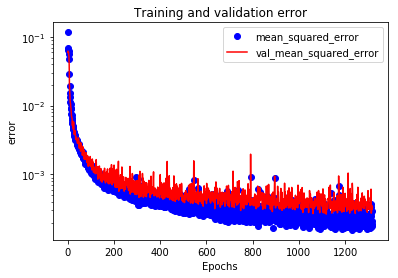

In [55]:
acc = history_dict['mean_squared_error']
val_acc = history_dict['val_mean_squared_error']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, acc, 'bo', label='mean_squared_error')
# b is for "solid blue line"
plt.plot(epochs, val_acc, 'r', label='val_mean_squared_error')
plt.title('Training and validation error')
plt.xlabel('Epochs')
plt.ylabel('error')
plt.yscale('log')
plt.legend()

plt.show()

# now, we are going to test the performance of this model

In [154]:
#file_name_x = 'X_para2_test.p'
#file_name_y = 'Y_para2_test.p'
file_name_x = 'X_test_justsol1.p'
file_name_y = 'Y_test_justsol1.p'
test_data_x = pickle.load(open(file_name_x, "rb"))
test_data_y = pickle.load(open(file_name_y, "rb"))

features_list = [feature for feature in test_data_x]
targets_list = [feature for feature in test_data_y]
Numsamples = len(test_data_x[features_list[0]])
Numfeatures = len(test_data_x)
Numtargets = len(test_data_y)

new_targets_list=[]

x_data = np.zeros((Numsamples, Numfeatures))
y_data = np.zeros((Numsamples, Numtargets))

for j in range(len(features_list)):
    for i in range(0,Numsamples):
        x_data[i, j] = test_data_x[features_list[j]][i][0]

for j in range(len(targets_list)):
    if targets_list[j]=='x' or targets_list[j]=='px' or targets_list[j]=='y' or targets_list[j]=='py'\
    or targets_list[j]=='qb'or targets_list[j]=='twiss_x_gamma' or targets_list[j]=='twiss_y_gamma':
        continue
    else:
        new_targets_list.append(targets_list[j])
        for i in range(0,Numsamples):
            y_data[i, j] = test_data_y[targets_list[j]][i][0]
            
test_data_x = x_data
test_data_y = y_data

#so, we don't include px,x,y,py
test_data_y = test_data_y[:,~np.all(test_data_y == 0, axis=0)]

targets_list = new_targets_list


#I can clean up the data a little bit

for features_index in range(0,len(targets_list)):
    keep_index = []
    mean = np.mean(test_data_y[:, features_index])
    std = np.std(test_data_y[:, features_index])
    
    for index in range(0, test_data_y.shape[0]):
        if targets_list[features_index]=='max_enxy':
            if test_data_y[index,features_index]<max_allowed_emittance:

                keep_index.append(index)
            
            
        else:    
            keep_index.append(index)
    
    test_data_x = test_data_x[keep_index, :]
    test_data_y = test_data_y[keep_index, :]
    
#now, I am going to through emittance away as an output because we don't need to use emittance
test_data_y=test_data_y[:,1::]

In [155]:
test_data_x=((test_data_x-np.min(total_data_x,axis=0))*(2)/(np.max(total_data_x,axis=0)-np.min(total_data_x,axis=0)))-1
test_data_y=((test_data_y-np.min(total_data_y,axis=0))*(2)/(np.max(total_data_y,axis=0)-np.min(total_data_y,axis=0)))-1
print('min for Y, X: ',np.min(test_data_y,axis=0), np.min(test_data_x,axis=0))
print('max for Y, X: ',np.max(test_data_y,axis=0), np.max(test_data_x,axis=0))

min for Y, X:  [ 0.05023064 -0.66059884 -0.13647417 -0.99356736] [-9.77221131e-01 -3.99718933e-02 -3.52509135e-04 -5.39802526e-05
  2.22575002e-04  4.72626391e-04]
max for Y, X:  [ 0.65633652 -0.24603813  0.94158853  0.19412154] [ 9.86662770e-01 -3.99716951e-02 -3.52409321e-04 -5.38807062e-05
  2.22670742e-04  4.72725766e-04]


In [156]:
sort_index=np.argsort(test_data_x[:,0])
test_data_x=test_data_x[sort_index,:]
test_data_y=test_data_y[sort_index,:]

In [157]:
total_predict_data=np.zeros((test_data_y.shape[0],4))

for index in range(0,test_data_y.shape[0]):
    prediction = model_1.predict(np.reshape(test_data_x[index,:], (1, -1)))
    total_predict_data[index,:]=prediction

In [158]:
targets_list

['max_enxy', 'twiss_x_alpha', 'twiss_x_beta', 'twiss_y_alpha', 'twiss_y_beta']

In [159]:
plotting_test_data_x=(test_data_x+1)*(np.max(total_data_x,axis=0)-np.min(total_data_x,axis=0))/2+np.min(total_data_x,axis=0)
plotting_test_data_y=(test_data_y+1)*(np.max(total_data_y,axis=0)-np.min(total_data_y,axis=0))/2+np.min(total_data_y,axis=0)
plotting_total_predict_data=(total_predict_data+1)*(np.max(total_data_y,axis=0)-np.min(total_data_y,axis=0))/2+np.min(total_data_y,axis=0)

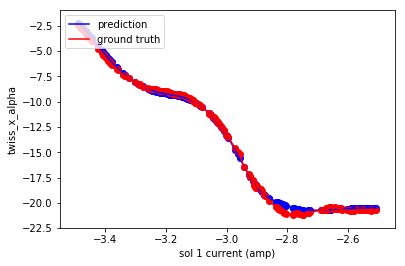

In [160]:
#now, we graph the result

#x_alpha

how_many_data_to_plot=300
which_parameter_to_plot=0

x_axis=plotting_test_data_x[:,0]    
    
temp=test_data_y.shape[0]
    
plt.plot(x_axis,plotting_total_predict_data[0:temp,which_parameter_to_plot],c='b',label='prediction')
plt.plot(x_axis,plotting_test_data_y[0:temp,which_parameter_to_plot],c='r',label='ground truth')

plt.scatter(x_axis,plotting_total_predict_data[0:temp,which_parameter_to_plot],c='b')
plt.scatter(x_axis,plotting_test_data_y[0:temp,which_parameter_to_plot],c='r')

plt.ylabel(targets_list[1+which_parameter_to_plot])
plt.xlabel('sol 1 current (amp)')
plt.legend(loc='upper left')

plt.show()

In [161]:
diff=plotting_test_data_y-plotting_total_predict_data
diff=diff[:,0]
diff=np.abs(diff)
diff=sum(diff)
diff=diff/plotting_test_data_y.shape[0]
diff

0.19132820095061612

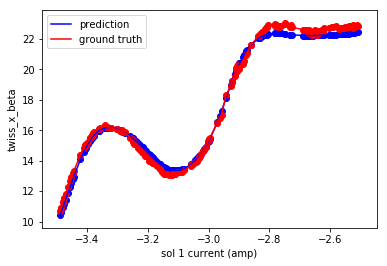

In [162]:
#now, we graph the result


how_many_data_to_plot=300
which_parameter_to_plot=1

x_axis=plotting_test_data_x[:,0]    
    
temp=test_data_y.shape[0]
    
plt.plot(x_axis,plotting_total_predict_data[0:temp,which_parameter_to_plot],c='b',label='prediction')
plt.plot(x_axis,plotting_test_data_y[0:temp,which_parameter_to_plot],c='r',label='ground truth')

plt.scatter(x_axis,plotting_total_predict_data[0:temp,which_parameter_to_plot],c='b')
plt.scatter(x_axis,plotting_test_data_y[0:temp,which_parameter_to_plot],c='r')

plt.ylabel(targets_list[1+which_parameter_to_plot])
plt.xlabel('sol 1 current (amp)')
plt.legend(loc='upper left')

plt.show()

In [163]:
diff=plotting_test_data_y-plotting_total_predict_data
diff=diff[:,1]
diff=np.abs(diff)
diff=sum(diff)
diff=diff/plotting_test_data_y.shape[0]
diff

0.2681203491419135

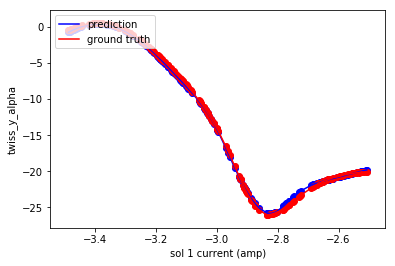

In [164]:
#now, we graph the result


how_many_data_to_plot=300
which_parameter_to_plot=2

x_axis=plotting_test_data_x[:,0]    
    
temp=test_data_y.shape[0]
    
plt.plot(x_axis,plotting_total_predict_data[0:temp,which_parameter_to_plot],c='b',label='prediction')
plt.plot(x_axis,plotting_test_data_y[0:temp,which_parameter_to_plot],c='r',label='ground truth')

plt.scatter(x_axis,plotting_total_predict_data[0:temp,which_parameter_to_plot],c='b')
plt.scatter(x_axis,plotting_test_data_y[0:temp,which_parameter_to_plot],c='r')

plt.ylabel(targets_list[1+which_parameter_to_plot])
plt.xlabel('sol 1 current (amp)')
plt.legend(loc='upper left')

plt.show()

In [165]:
diff=plotting_test_data_y-plotting_total_predict_data
diff=diff[:,2]
diff=np.abs(diff)
diff=sum(diff)
diff=diff/plotting_test_data_y.shape[0]
diff

0.1681114273002177

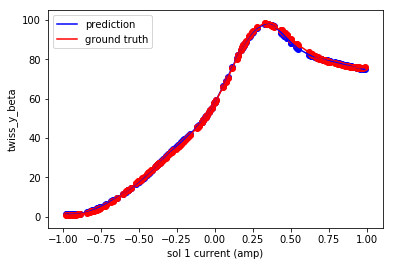

In [166]:
#now, we graph the result


how_many_data_to_plot=300
which_parameter_to_plot=3

x_axis=test_data_x[:,0]    
    
temp=plotting_test_data_y.shape[0]
    
plt.plot(x_axis,plotting_total_predict_data[0:temp,which_parameter_to_plot],c='b',label='prediction')
plt.plot(x_axis,plotting_test_data_y[0:temp,which_parameter_to_plot],c='r',label='ground truth')

plt.scatter(x_axis,plotting_total_predict_data[0:temp,which_parameter_to_plot],c='b')
plt.scatter(x_axis,plotting_test_data_y[0:temp,which_parameter_to_plot],c='r')

plt.ylabel(targets_list[1+which_parameter_to_plot])
plt.xlabel('sol 1 current (amp)')
plt.legend(loc='upper left')

plt.show()

In [167]:
diff=plotting_test_data_y-plotting_total_predict_data
diff=diff[:,3]
diff=np.abs(diff)
diff=sum(diff)
diff=diff/plotting_test_data_y.shape[0]
diff

0.44112800400933905

In [65]:
#file_name_x = 'X_para2_test.p'
#file_name_y = 'Y_para2_test.p'
file_name_x = 'X_test_justquad4.p'
file_name_y = 'Y_test_justquad4.p'
test_data_x = pickle.load(open(file_name_x, "rb"))
test_data_y = pickle.load(open(file_name_y, "rb"))

features_list = [feature for feature in test_data_x]
targets_list = [feature for feature in test_data_y]
Numsamples = len(test_data_x[features_list[0]])
Numfeatures = len(test_data_x)
Numtargets = len(test_data_y)

new_targets_list=[]

x_data = np.zeros((Numsamples, Numfeatures))
y_data = np.zeros((Numsamples, Numtargets))

for j in range(len(features_list)):
    for i in range(0,Numsamples):
        x_data[i, j] = test_data_x[features_list[j]][i][0]

for j in range(len(targets_list)):
    if targets_list[j]=='x' or targets_list[j]=='px' or targets_list[j]=='y' or targets_list[j]=='py'\
    or targets_list[j]=='qb'or targets_list[j]=='twiss_x_gamma' or targets_list[j]=='twiss_y_gamma':
        continue
    else:
        new_targets_list.append(targets_list[j])
        for i in range(0,Numsamples):
            y_data[i, j] = test_data_y[targets_list[j]][i][0]
            
test_data_x = x_data
test_data_y = y_data

#so, we don't include px,x,y,py
test_data_y = test_data_y[:,~np.all(test_data_y == 0, axis=0)]

targets_list = new_targets_list


#I can clean up the data a little bit

for features_index in range(0,len(targets_list)):
    keep_index = []
    mean = np.mean(test_data_y[:, features_index])
    std = np.std(test_data_y[:, features_index])
    
    for index in range(0, test_data_y.shape[0]):
        if targets_list[features_index]=='max_enxy':
            if test_data_y[index,features_index]<max_allowed_emittance:

                keep_index.append(index)
            
            
        else:    
            keep_index.append(index)
    
    test_data_x = test_data_x[keep_index, :]
    test_data_y = test_data_y[keep_index, :]
    
#now, I am going to through emittance away as an output because we don't need to use emittance
test_data_y=test_data_y[:,1::]

In [66]:
test_data_x=((test_data_x-np.min(total_data_x,axis=0))*(2)/(np.max(total_data_x,axis=0)-np.min(total_data_x,axis=0)))-1
test_data_y=((test_data_y-np.min(total_data_y,axis=0))*(2)/(np.max(total_data_y,axis=0)-np.min(total_data_y,axis=0)))-1
print('min for Y, X: ',np.min(test_data_y,axis=0), np.min(test_data_x,axis=0))
print('max for Y, X: ',np.max(test_data_y,axis=0), np.max(test_data_x,axis=0))

min for Y, X:  [ 0.20493509 -0.52765214  0.18701863 -0.75480081] [ 1.70986132e-04 -3.99718939e-02 -5.00529291e-01 -5.39807049e-05
  2.22573685e-04 -9.80478841e-01]
max for Y, X:  [ 0.22871819 -0.34454687  0.73103692 -0.02952656] [ 1.71185628e-04 -3.99716949e-02 -5.00529281e-01 -5.39707447e-05
  2.22583536e-04  9.98432247e-01]


In [67]:
for index in range(0,len(features_list)):
    print('the feature is',features_list[index])
    print(max(test_data_x[:,index]))
    print(min(test_data_x[:,index]))
    print(' ')

the feature is sol_1_current
0.00017118562777285184
0.00017098613217991776
 
the feature is sol_2_current
-0.0399716948643154
-0.039971893923888335
 
the feature is A3Quad_1_current
-0.5005292809889976
-0.5005292907326065
 
the feature is A3Quad_2_current
-5.397074471191754e-05
-5.398070491413609e-05
 
the feature is A3Quad_3_current
0.0002225835360389894
0.0002225736848140425
 
the feature is A3Quad_4_current
0.9984322472742189
-0.9804788406400338
 


In [68]:
sort_index=np.argsort(test_data_x[:,5])
test_data_x=test_data_x[sort_index,:]
test_data_y=test_data_y[sort_index,:]

In [69]:
total_predict_data=np.zeros((test_data_y.shape[0],4))

for index in range(0,test_data_y.shape[0]):
    prediction = model_1.predict(np.reshape(test_data_x[index,:], (1, -1)))
    total_predict_data[index,:]=prediction

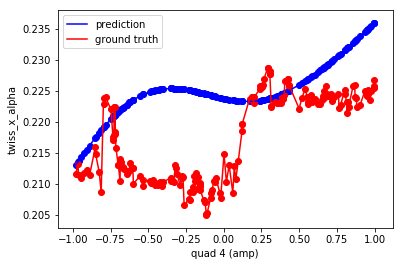

In [70]:
#now, we graph the result

#x_alpha

how_many_data_to_plot=300
which_parameter_to_plot=0

x_axis=test_data_x[:,5]    
    
temp=test_data_y.shape[0]
    
plt.plot(x_axis,total_predict_data[0:temp,which_parameter_to_plot],c='b',label='prediction')
plt.plot(x_axis,test_data_y[0:temp,which_parameter_to_plot],c='r',label='ground truth')

plt.scatter(x_axis,total_predict_data[0:temp,which_parameter_to_plot],c='b')
plt.scatter(x_axis,test_data_y[0:temp,which_parameter_to_plot],c='r')

plt.ylabel(targets_list[1+which_parameter_to_plot])
plt.xlabel('quad 4 (amp)')
plt.legend(loc='upper left')

plt.show()

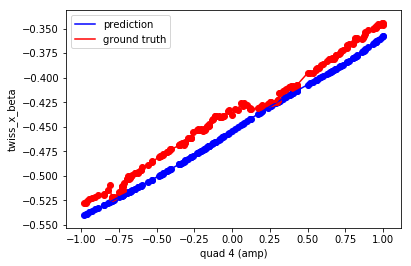

In [71]:
#now, we graph the result


which_parameter_to_plot=1

x_axis=test_data_x[:,5]    
    
temp=test_data_y.shape[0]
    
plt.plot(x_axis,total_predict_data[0:temp,which_parameter_to_plot],c='b',label='prediction')
plt.plot(x_axis,test_data_y[0:temp,which_parameter_to_plot],c='r',label='ground truth')

plt.scatter(x_axis,total_predict_data[0:temp,which_parameter_to_plot],c='b')
plt.scatter(x_axis,test_data_y[0:temp,which_parameter_to_plot],c='r')

plt.ylabel(targets_list[1+which_parameter_to_plot])
plt.xlabel('quad 4 (amp)')
plt.legend(loc='upper left')

plt.show()

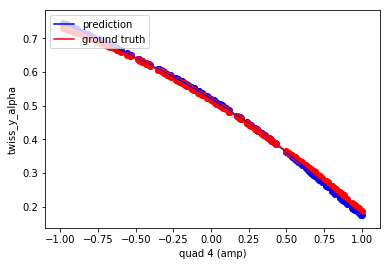

In [72]:
#now, we graph the result


which_parameter_to_plot=2

x_axis=test_data_x[:,5]    
    
temp=test_data_y.shape[0]
    
plt.plot(x_axis,total_predict_data[0:temp,which_parameter_to_plot],c='b',label='prediction')
plt.plot(x_axis,test_data_y[0:temp,which_parameter_to_plot],c='r',label='ground truth')

plt.scatter(x_axis,total_predict_data[0:temp,which_parameter_to_plot],c='b')
plt.scatter(x_axis,test_data_y[0:temp,which_parameter_to_plot],c='r')

plt.ylabel(targets_list[1+which_parameter_to_plot])
plt.xlabel('quad 4 (amp)')
plt.legend(loc='upper left')

plt.show()

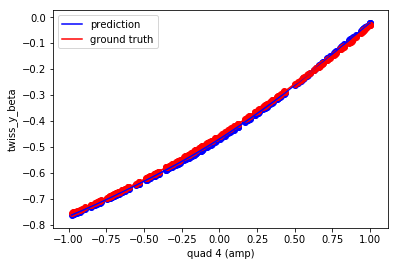

In [73]:
#now, we graph the result


which_parameter_to_plot=3

x_axis=test_data_x[:,5]    
    
temp=test_data_y.shape[0]
    
plt.plot(x_axis,total_predict_data[0:temp,which_parameter_to_plot],c='b',label='prediction')
plt.plot(x_axis,test_data_y[0:temp,which_parameter_to_plot],c='r',label='ground truth')

plt.scatter(x_axis,total_predict_data[0:temp,which_parameter_to_plot],c='b')
plt.scatter(x_axis,test_data_y[0:temp,which_parameter_to_plot],c='r')

plt.ylabel(targets_list[1+which_parameter_to_plot])
plt.xlabel('quad 4 (amp)')
plt.legend(loc='upper left')

plt.show()

In [74]:
#file_name_x = 'X_para2_test.p'
#file_name_y = 'Y_para2_test.p'
file_name_x = 'X_test_justquad1.p'
file_name_y = 'Y_test_justquad1.p'
test_data_x = pickle.load(open(file_name_x, "rb"))
test_data_y = pickle.load(open(file_name_y, "rb"))

features_list = [feature for feature in test_data_x]
targets_list = [feature for feature in test_data_y]
Numsamples = len(test_data_x[features_list[0]])
Numfeatures = len(test_data_x)
Numtargets = len(test_data_y)

new_targets_list=[]

x_data = np.zeros((Numsamples, Numfeatures))
y_data = np.zeros((Numsamples, Numtargets))

for j in range(len(features_list)):
    for i in range(0,Numsamples):
        x_data[i, j] = test_data_x[features_list[j]][i][0]

for j in range(len(targets_list)):
    if targets_list[j]=='x' or targets_list[j]=='px' or targets_list[j]=='y' or targets_list[j]=='py'\
    or targets_list[j]=='qb'or targets_list[j]=='twiss_x_gamma' or targets_list[j]=='twiss_y_gamma':
        continue
    else:
        new_targets_list.append(targets_list[j])
        for i in range(0,Numsamples):
            y_data[i, j] = test_data_y[targets_list[j]][i][0]
            
test_data_x = x_data
test_data_y = y_data

#so, we don't include px,x,y,py
test_data_y = test_data_y[:,~np.all(test_data_y == 0, axis=0)]

targets_list = new_targets_list


#I can clean up the data a little bit

for features_index in range(0,len(targets_list)):
    keep_index = []
    mean = np.mean(test_data_y[:, features_index])
    std = np.std(test_data_y[:, features_index])
    
    for index in range(0, test_data_y.shape[0]):
        if targets_list[features_index]=='max_enxy':
            if test_data_y[index,features_index]<max_allowed_emittance:

                keep_index.append(index)
            
            
        else:    
            keep_index.append(index)
    
    test_data_x = test_data_x[keep_index, :]
    test_data_y = test_data_y[keep_index, :]
    
#now, I am going to through emittance away as an output because we don't need to use emittance
test_data_y=test_data_y[:,1::]

In [75]:
test_data_x=((test_data_x-np.min(total_data_x,axis=0))*(2)/(np.max(total_data_x,axis=0)-np.min(total_data_x,axis=0)))-1
test_data_y=((test_data_y-np.min(total_data_y,axis=0))*(2)/(np.max(total_data_y,axis=0)-np.min(total_data_y,axis=0)))-1
print('min for Y, X: ',np.min(test_data_y,axis=0), np.min(test_data_x,axis=0))
print('max for Y, X: ',np.max(test_data_y,axis=0), np.max(test_data_x,axis=0))

min for Y, X:  [ 0.2623439  -0.67689954  0.22886399 -0.75292571] [-1.79895899e-01 -3.99718943e-02 -9.67564791e-01 -5.39805878e-05
  2.22574874e-04  4.72626373e-04]
max for Y, X:  [ 0.53386497 -0.48101427  0.7992093  -0.1885591 ] [-1.79895700e-01 -3.99716951e-02  9.88009255e-01 -5.38811150e-05
  2.22673212e-04  4.72725885e-04]


In [76]:
sort_index=np.argsort(test_data_x[:,2])
test_data_x=test_data_x[sort_index,:]
test_data_y=test_data_y[sort_index,:]

In [77]:
total_predict_data=np.zeros((test_data_y.shape[0],4))

for index in range(0,test_data_y.shape[0]):
    prediction = model_1.predict(np.reshape(test_data_x[index,:], (1, -1)))
    total_predict_data[index,:]=prediction

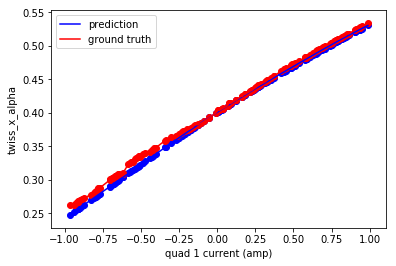

In [78]:
#now, we graph the result

#x_alpha

which_parameter_to_plot=0

x_axis=test_data_x[:,2]    
    
temp=test_data_y.shape[0]
    
plt.plot(x_axis,total_predict_data[0:temp,which_parameter_to_plot],c='b',label='prediction')
plt.plot(x_axis,test_data_y[0:temp,which_parameter_to_plot],c='r',label='ground truth')

plt.scatter(x_axis,total_predict_data[0:temp,which_parameter_to_plot],c='b')
plt.scatter(x_axis,test_data_y[0:temp,which_parameter_to_plot],c='r')

plt.ylabel(targets_list[1+which_parameter_to_plot])
plt.xlabel('quad 1 current (amp)')
plt.legend(loc='upper left')

plt.show()

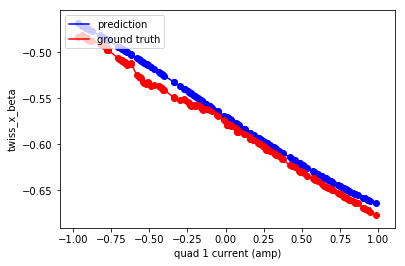

In [79]:
#now, we graph the result

which_parameter_to_plot=1

x_axis=test_data_x[:,2]    
    
temp=test_data_y.shape[0]
    
plt.plot(x_axis,total_predict_data[0:temp,which_parameter_to_plot],c='b',label='prediction')
plt.plot(x_axis,test_data_y[0:temp,which_parameter_to_plot],c='r',label='ground truth')

plt.scatter(x_axis,total_predict_data[0:temp,which_parameter_to_plot],c='b')
plt.scatter(x_axis,test_data_y[0:temp,which_parameter_to_plot],c='r')

plt.ylabel(targets_list[1+which_parameter_to_plot])
plt.xlabel('quad 1 current (amp)')
plt.legend(loc='upper left')

plt.show()

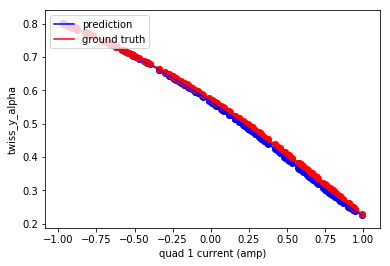

In [80]:
#now, we graph the result

which_parameter_to_plot=2

x_axis=test_data_x[:,2]    
    
temp=test_data_y.shape[0]
    
plt.plot(x_axis,total_predict_data[0:temp,which_parameter_to_plot],c='b',label='prediction')
plt.plot(x_axis,test_data_y[0:temp,which_parameter_to_plot],c='r',label='ground truth')

plt.scatter(x_axis,total_predict_data[0:temp,which_parameter_to_plot],c='b')
plt.scatter(x_axis,test_data_y[0:temp,which_parameter_to_plot],c='r')

plt.ylabel(targets_list[1+which_parameter_to_plot])
plt.xlabel('quad 1 current (amp)')
plt.legend(loc='upper left')

plt.show()

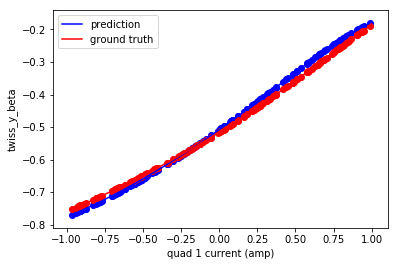

In [81]:
#now, we graph the result

which_parameter_to_plot=3

x_axis=test_data_x[:,2]    
    
temp=test_data_y.shape[0]
    
plt.plot(x_axis,total_predict_data[0:temp,which_parameter_to_plot],c='b',label='prediction')
plt.plot(x_axis,test_data_y[0:temp,which_parameter_to_plot],c='r',label='ground truth')

plt.scatter(x_axis,total_predict_data[0:temp,which_parameter_to_plot],c='b')
plt.scatter(x_axis,test_data_y[0:temp,which_parameter_to_plot],c='r')

plt.ylabel(targets_list[1+which_parameter_to_plot])
plt.xlabel('quad 1 current (amp)')
plt.legend(loc='upper left')

plt.show()

# now, we are going to see how the model does when all parameters are varying

In [141]:
#now, let's see what happens when we vary all 6 input parameters

#file_name_x = 'X_para2_test.p'
#file_name_y = 'Y_para2_test.p'
file_name_x = 'X_test_all.p'
file_name_y = 'Y_test_all.p'
test_data_x = pickle.load(open(file_name_x, "rb"))
test_data_y = pickle.load(open(file_name_y, "rb"))

features_list = [feature for feature in test_data_x]
targets_list = [feature for feature in test_data_y]
Numsamples = len(test_data_x[features_list[0]])
Numfeatures = len(test_data_x)
Numtargets = len(test_data_y)

new_targets_list=[]

x_data = np.zeros((Numsamples, Numfeatures))
y_data = np.zeros((Numsamples, Numtargets))

for j in range(len(features_list)):
    for i in range(0,Numsamples):
        x_data[i, j] = test_data_x[features_list[j]][i][0]

for j in range(len(targets_list)):
    if targets_list[j]=='x' or targets_list[j]=='px' or targets_list[j]=='y' or targets_list[j]=='py'\
    or targets_list[j]=='qb'or targets_list[j]=='twiss_x_gamma' or targets_list[j]=='twiss_y_gamma':
        continue
    else:
        new_targets_list.append(targets_list[j])
        for i in range(0,Numsamples):
            y_data[i, j] = test_data_y[targets_list[j]][i][0]
            
test_data_x = x_data
test_data_y = y_data

#so, we don't include px,x,y,py
test_data_y = test_data_y[:,~np.all(test_data_y == 0, axis=0)]

targets_list = new_targets_list


#I can clean up the data a little bit

for features_index in range(0,len(targets_list)):
    keep_index = []
    mean = np.mean(test_data_y[:, features_index])
    std = np.std(test_data_y[:, features_index])
    
    for index in range(0, test_data_y.shape[0]):
        if targets_list[features_index]=='max_enxy':
            if test_data_y[index,features_index]<max_allowed_emittance:

                keep_index.append(index)
            
            
        else:    
            keep_index.append(index)
    
    test_data_x = test_data_x[keep_index, :]
    test_data_y = test_data_y[keep_index, :]
    
#now, I am going to through emittance away as an output because we don't need to use emittance
test_data_y=test_data_y[:,1::]

In [142]:
#now, we want to know the input parameter range for this testing dataset

for index in range(0,len(features_list)):
    print('the feature is',features_list[index])
    print(max(test_data_x[:,index]))
    print(min(test_data_x[:,index]))
    print(' ')

the feature is sol_1_current
-2.5130218153905384
-3.4965535186125267
 
the feature is sol_2_current
2.7940099515853354
1.8031387429141603
 
the feature is A3Quad_1_current
-6.000577886535028
-7.997092421179527
 
the feature is A3Quad_2_current
6.498662389174472
4.505091637355917
 
the feature is A3Quad_3_current
4.590131038557003
2.6117306495442656
 
the feature is A3Quad_4_current
-7.318531220712396
-9.276508929364423
 


In [143]:
test_data_x=((test_data_x-np.min(total_data_x,axis=0))*(2)/(np.max(total_data_x,axis=0)-np.min(total_data_x,axis=0)))-1
test_data_y=((test_data_y-np.min(total_data_y,axis=0))*(2)/(np.max(total_data_y,axis=0)-np.min(total_data_y,axis=0)))-1
print('min for Y, X: ',np.min(test_data_y,axis=0), np.min(test_data_x,axis=0))
print('max for Y, X: ',np.max(test_data_y,axis=0), np.max(test_data_x,axis=0))

min for Y, X:  [-1.03700062 -0.99562903 -0.51861037 -0.98572975] [-0.99330488 -0.99417757 -0.99779755 -0.99530188 -0.98830722 -0.97650228]
max for Y, X:  [0.91356605 0.8760724  0.99604475 0.85665049] [0.97448946 0.98856881 0.99942324 0.99894923 0.99061455 0.98240995]


In [144]:
total_predict_data=np.zeros((test_data_y.shape))

for index in range(0,test_data_y.shape[0]):
    prediction = model_1.predict(np.reshape(test_data_x[index,:], (1, -1)))
    total_predict_data[index,:]=prediction

In [145]:
plotting_test_data_x=(test_data_x+1)*(np.max(total_data_x,axis=0)-np.min(total_data_x,axis=0))/2+np.min(total_data_x,axis=0)
plotting_test_data_y=(test_data_y+1)*(np.max(total_data_y,axis=0)-np.min(total_data_y,axis=0))/2+np.min(total_data_y,axis=0)
plotting_total_predict_data=(total_predict_data+1)*(np.max(total_data_y,axis=0)-np.min(total_data_y,axis=0))/2+np.min(total_data_y,axis=0)

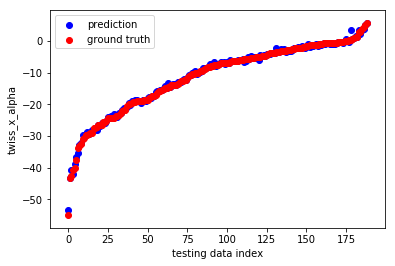

In [146]:
#now, we plot the ground truth and the prediction
#the y axis will be the objective
#the x axis will the testing data index

which_parameter_to_plot=0


#i can sort the data according to the y label
sort_index=np.argsort(plotting_test_data_y[:,which_parameter_to_plot])
plotting_test_data_x=plotting_test_data_x[sort_index,:]
plotting_test_data_y=plotting_test_data_y[sort_index,:]
plotting_total_predict_data=plotting_total_predict_data[sort_index,:]

x_axis=[]
for index in range(0,min(how_many_data_to_plot,test_data_y.shape[0])):
    x_axis.append(index) 

temp=plotting_test_data_y.shape[0]
    
#plt.plot(x_axis,total_predict_data[0:temp,which_parameter_to_plot],c='b',label='prediction')
#plt.plot(x_axis,test_data_y[0:temp,which_parameter_to_plot],c='r',label='ground truth')

plt.scatter(x_axis,plotting_total_predict_data[0:temp,which_parameter_to_plot],c='b',label='prediction')
plt.scatter(x_axis,plotting_test_data_y[0:temp,which_parameter_to_plot],c='r',label='ground truth')

plt.ylabel(targets_list[1])
plt.xlabel('testing data index')
plt.legend(loc='upper left')

plt.show()

In [147]:
diff=plotting_test_data_y-plotting_total_predict_data
diff=diff[:,0]
diff=np.abs(diff)
diff=sum(diff)
diff=diff/plotting_test_data_y.shape[0]
diff

0.37470923535405426

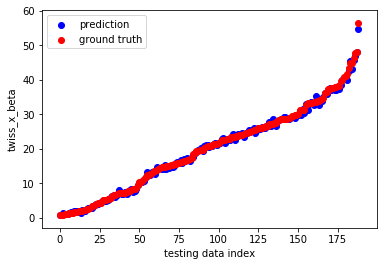

In [148]:
#now, we plot the ground truth and the prediction
#the y axis will be the objective
#the x axis will the testing data index

which_parameter_to_plot=1


#i can sort the data according to the y label
sort_index=np.argsort(plotting_test_data_y[:,which_parameter_to_plot])
plotting_test_data_x=plotting_test_data_x[sort_index,:]
plotting_test_data_y=plotting_test_data_y[sort_index,:]
plotting_total_predict_data=plotting_total_predict_data[sort_index,:]

x_axis=[]
for index in range(0,min(how_many_data_to_plot,test_data_y.shape[0])):
    x_axis.append(index) 

temp=plotting_test_data_y.shape[0]
    
#plt.plot(x_axis,total_predict_data[0:temp,which_parameter_to_plot],c='b',label='prediction')
#plt.plot(x_axis,test_data_y[0:temp,which_parameter_to_plot],c='r',label='ground truth')

plt.scatter(x_axis,plotting_total_predict_data[0:temp,which_parameter_to_plot],c='b',label='prediction')
plt.scatter(x_axis,plotting_test_data_y[0:temp,which_parameter_to_plot],c='r',label='ground truth')

plt.ylabel(targets_list[1+which_parameter_to_plot])
plt.xlabel('testing data index')
plt.legend(loc='upper left')

plt.show()

In [149]:
diff=plotting_test_data_y-plotting_total_predict_data
diff=diff[:,1]
diff=np.abs(diff)
diff=sum(diff)
diff=diff/plotting_test_data_y.shape[0]
diff

0.3966378988227589

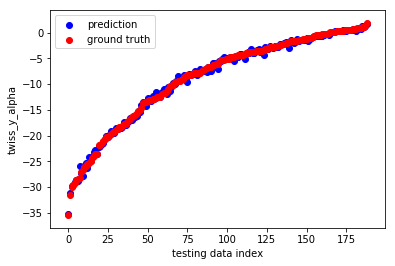

In [150]:
#now, we plot the ground truth and the prediction
#the y axis will be the objective
#the x axis will the testing data index

which_parameter_to_plot=2


#i can sort the data according to the y label
sort_index=np.argsort(plotting_test_data_y[:,which_parameter_to_plot])
plotting_test_data_x=plotting_test_data_x[sort_index,:]
plotting_test_data_y=plotting_test_data_y[sort_index,:]
plotting_total_predict_data=plotting_total_predict_data[sort_index,:]

x_axis=[]
for index in range(0,min(how_many_data_to_plot,test_data_y.shape[0])):
    x_axis.append(index) 

temp=plotting_test_data_y.shape[0]
    
#plt.plot(x_axis,total_predict_data[0:temp,which_parameter_to_plot],c='b',label='prediction')
#plt.plot(x_axis,test_data_y[0:temp,which_parameter_to_plot],c='r',label='ground truth')

plt.scatter(x_axis,plotting_total_predict_data[0:temp,which_parameter_to_plot],c='b',label='prediction')
plt.scatter(x_axis,plotting_test_data_y[0:temp,which_parameter_to_plot],c='r',label='ground truth')

plt.ylabel(targets_list[1+which_parameter_to_plot])
plt.xlabel('testing data index')
plt.legend(loc='upper left')

plt.show()

In [151]:
diff=plotting_test_data_y-plotting_total_predict_data
diff=diff[:,2]
diff=np.abs(diff)
diff=sum(diff)
diff=diff/plotting_test_data_y.shape[0]
diff

0.30611416004221975

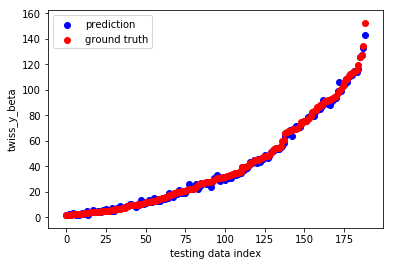

In [152]:
#now, we plot the ground truth and the prediction
#the y axis will be the objective
#the x axis will the testing data index

which_parameter_to_plot=3


#i can sort the data according to the y label
sort_index=np.argsort(plotting_test_data_y[:,which_parameter_to_plot])
plotting_test_data_x=plotting_test_data_x[sort_index,:]
plotting_test_data_y=plotting_test_data_y[sort_index,:]
plotting_total_predict_data=plotting_total_predict_data[sort_index,:]

x_axis=[]
for index in range(0,min(how_many_data_to_plot,test_data_y.shape[0])):
    x_axis.append(index) 

temp=plotting_test_data_y.shape[0]
    
#plt.plot(x_axis,total_predict_data[0:temp,which_parameter_to_plot],c='b',label='prediction')
#plt.plot(x_axis,test_data_y[0:temp,which_parameter_to_plot],c='r',label='ground truth')

plt.scatter(x_axis,plotting_total_predict_data[0:temp,which_parameter_to_plot],c='b',label='prediction')
plt.scatter(x_axis,plotting_test_data_y[0:temp,which_parameter_to_plot],c='r',label='ground truth')

plt.ylabel(targets_list[1+which_parameter_to_plot])
plt.xlabel('testing data index')
plt.legend(loc='upper left')

plt.show()

In [153]:
diff=plotting_test_data_y-plotting_total_predict_data
diff=diff[:,3]
diff=np.abs(diff)
diff=sum(diff)
diff=diff/plotting_test_data_y.shape[0]
diff

1.167797054184391

# now, we are going to try to do the minimization/control step

In [90]:
error_history=[]

In [91]:
test_case_index=34

In [92]:
#note that regr is the surrogate model

#now, I can use the surrogate model as the core of a minimization scheme

def objective_function(x):
    
    #print('this objective function is being called')
    
    desired_output=np.array(test_data_y[test_case_index,:]) #<<<<<<<<<<<<<<<you tell the program what twiss parameter you want
    
    #desired_output =  [-0.09641713, -0.02303045,  0.04592067,  0.19913952]
    #desired_output = np.asarray(desired_output)
    #desired_output = np.reshape(desired_output,(1,-1))
    
    sol_1_current=x[0]
    sol_2_current=x[1]
    A3Quad_1_current=x[2]
    A3Quad_2_current=x[3]
    A3Quad_3_current=x[4]
    A3Quad_4_current=x[5]
    
    input_list=[sol_1_current,sol_2_current,A3Quad_1_current,A3Quad_2_current,A3Quad_3_current,A3Quad_4_current]
    #print('the input list is',input_list)
    input_list = np.asarray(input_list)
    input_list = np.reshape(input_list,(1,-1))
    
    
    #i cal the surrogate model
    prediction = model_1.predict(input_list)


    #I compute the error
    error = sum(sum((prediction-desired_output)**2))
    
    
    #print('the error is',error)

    error_history.append(error)
    
    return error

In [93]:
#begin to minimize
from scipy.optimize import minimize

def begin_to_minimize():
    
    #bnds = ((0, 360), (0, 360))
    
    bnds = ((-1, 1), (-1, 1), (-1,1), (-1,1), (-1,1), (-1,1))
    
    #x0 = np.array([264,30])
    #res = minimize(angle_function, x0, method='TNC',bounds=bnds,options={'eps': 0.005,
    #                                                                    'scale': None, 'offset': None, 'mesg_num': None, 'maxCGit': -1, 'maxiter': None, 'eta': -1, 'stepmx': 0, 
    #                                                                     'accuracy': 0, 'minfev': 0, 'ftol': -1, 'xtol': -1, 'gtol': -1, 'rescale': -1, 'disp': False})
    
    #x0=test_data_x[initial_guess,:]
    x0=np.random.uniform(0,1,6)
    res = minimize(objective_function,x0,method='TNC',bounds=bnds,options={'eps':0.01})
    
    #res = minimize(angle_function, x0, method='TNC',bounds=bnds)
                   
    #print('*****')
    #print('the final result is',res)
    
    return res

In [168]:
r

     fun: 0.06342926848764177
     jac: array([ 0.39864898, -0.19747481,  0.01316155,  0.01924546,  0.07627944,
        0.12907235])
 message: 'Converged (|f_n-f_(n-1)| ~= 0)'
    nfev: 91
     nit: 7
  status: 1
 success: True
       x: array([ 0.44599011, -0.06758592,  0.99824287, -0.49618091,  0.5426459 ,
        0.82138758])

In [94]:
#we want to have many random guess and then pick the one with the least distance

error_list_for_different_trial=[]
temp_final_result=np.zeros((0,test_data_x.shape[1]))

for index in range(0,100):

    
    r=begin_to_minimize()

    a_result=r.x
    a_result=np.reshape(a_result,(1,-1))

    if np.all(np.abs(a_result)<1):
        error_list_for_different_trial.append(r.fun)
        temp_final_result=np.concatenate((temp_final_result,a_result),axis=0)
    
    print('finished index',index)

finished index 0
finished index 1
finished index 2
finished index 3
finished index 4
finished index 5
finished index 6
finished index 7
finished index 8
finished index 9
finished index 10
finished index 11
finished index 12
finished index 13
finished index 14
finished index 15
finished index 16
finished index 17
finished index 18
finished index 19
finished index 20
finished index 21
finished index 22
finished index 23
finished index 24
finished index 25
finished index 26
finished index 27
finished index 28
finished index 29
finished index 30
finished index 31
finished index 32
finished index 33
finished index 34
finished index 35
finished index 36
finished index 37
finished index 38
finished index 39
finished index 40
finished index 41
finished index 42
finished index 43
finished index 44
finished index 45
finished index 46
finished index 47
finished index 48
finished index 49
finished index 50
finished index 51
finished index 52
finished index 53
finished index 54
finished index 55
fi

In [95]:
selector=error_list_for_different_trial==min(error_list_for_different_trial)
result=temp_final_result[selector,:]

In [96]:
print('the true value is',test_data_x[test_case_index,:])
print('the predicted value is',result)

the true value is [ 0.11059086 -0.68689765  0.8650627   0.80072134  0.45622213  0.9649691 ]
the predicted value is [[-0.28168    -0.80462891  0.31267736  0.3605791  -0.42900802  0.5922175 ]]


In [97]:
print('the true twiss parameter is',test_data_y[test_case_index,:])

prediction1 = model_1.predict(result)

r=prediction1


print('the predicted twiss parameter is',r)

the true twiss parameter is [ 0.70973359 -0.9701157   0.84344274 -0.92527698]
the predicted twiss parameter is [[ 0.70959467 -0.97387934  0.8434588  -0.9272588 ]]


In [98]:
result=np.reshape(result,(1,-1))

In [99]:
#now, we want to scale back all the data to its original numerical range

controler_twiss_input=test_data_y[test_case_index,:]
controler_twiss_input=(controler_twiss_input+1)*(np.max(total_data_y,axis=0)-np.min(total_data_y,axis=0))/2+np.min(total_data_y,axis=0)
r=(r+1)*(np.max(total_data_y,axis=0)-np.min(total_data_y,axis=0))/2+np.min(total_data_y,axis=0)

In [100]:
print('control input twiss parameter is',controler_twiss_input)
print('ml calculated twiss parameter is',r)

control input twiss parameter is [-0.73379728  1.49552691 -1.9144553   6.59919211]
ml calculated twiss parameter is [[-0.73810708  1.38355458 -1.91406049  6.43694823]]


In [101]:
gpt_input=test_data_x[test_case_index,:]
gpt_input=(gpt_input+1)*(np.max(total_data_x,axis=0)-np.min(total_data_x,axis=0))/2+np.min(total_data_x,axis=0)
result=(result+1)*(np.max(total_data_x,axis=0)-np.min(total_data_x,axis=0))/2+np.min(total_data_x,axis=0)

In [102]:
print('the gpt input used to generate control twiss parameter is',gpt_input)
print('the result from ML and optimization is',result)

the gpt input used to generate control twiss parameter is [-2.94481067  1.95670091 -6.13489091  6.30050213  4.05587941 -7.33596376]
the result from ML and optimization is [[-3.14087325  1.89786508 -6.68708092  5.86051005  3.1708825  -7.70853753]]


In [103]:
model_1.save('combined_model_3700.h5')  # creates a HDF5 file 'my_model.h5'

# now, what I want to do is to test the algorithm on some trial data

In [104]:
#now, let's see what happens when we vary all 6 input parameters

#file_name_x = 'X_para2_test.p'
#file_name_y = 'Y_para2_test.p'
file_name_x = 'ml_test_x.p'
file_name_y = 'ml_test_y.p'
test_data_x = pickle.load(open(file_name_x, "rb"))
test_data_y = pickle.load(open(file_name_y, "rb"))

features_list = [feature for feature in test_data_x]
targets_list = [feature for feature in test_data_y]
Numsamples = len(test_data_x[features_list[0]])
Numfeatures = len(test_data_x)
Numtargets = len(test_data_y)

new_targets_list=[]

x_data = np.zeros((Numsamples, Numfeatures))
y_data = np.zeros((Numsamples, Numtargets))

for j in range(len(features_list)):
    for i in range(0,Numsamples):
        x_data[i, j] = test_data_x[features_list[j]][i][0]

for j in range(len(targets_list)):
    if targets_list[j]=='x' or targets_list[j]=='px' or targets_list[j]=='y' or targets_list[j]=='py'\
    or targets_list[j]=='qb'or targets_list[j]=='twiss_x_gamma' or targets_list[j]=='twiss_y_gamma':
        continue
    else:
        new_targets_list.append(targets_list[j])
        for i in range(0,Numsamples):
            y_data[i, j] = test_data_y[targets_list[j]][i][0]
            
test_data_x = x_data
test_data_y = y_data

#so, we don't include px,x,y,py
test_data_y = test_data_y[:,~np.all(test_data_y == 0, axis=0)]

targets_list = new_targets_list


#I can clean up the data a little bit

for features_index in range(0,len(targets_list)):
    keep_index = []
    mean = np.mean(test_data_y[:, features_index])
    std = np.std(test_data_y[:, features_index])
    
    for index in range(0, test_data_y.shape[0]):
        if targets_list[features_index]=='max_enxy':
            if test_data_y[index,features_index]<max_allowed_emittance:

                keep_index.append(index)
            
            
        else:    
            keep_index.append(index)
    
    test_data_x = test_data_x[keep_index, :]
    test_data_y = test_data_y[keep_index, :]
    
#now, I am going to through emittance away as an output because we don't need to use emittance
test_data_y=test_data_y[:,1::]

In [105]:
#now, we want to know the input parameter range for this testing dataset

for index in range(0,len(features_list)):
    print('the feature is',features_list[index])
    print(max(test_data_x[:,index]))
    print(min(test_data_x[:,index]))
    print(' ')

the feature is sol_1_current
-2.5535401366341226
-3.490168059038345
 
the feature is sol_2_current
2.7827898845997474
1.820028669634539
 
the feature is A3Quad_1_current
-6.011992400057493
-7.98315621162952
 
the feature is A3Quad_2_current
6.4963132208783545
4.530041997934385
 
the feature is A3Quad_3_current
4.547928755040279
2.614618680144133
 
the feature is A3Quad_4_current
-7.31182372347822
-9.284717302278011
 


In [106]:
test_data_x=((test_data_x-np.min(total_data_x,axis=0))*(2)/(np.max(total_data_x,axis=0)-np.min(total_data_x,axis=0)))-1
test_data_y=((test_data_y-np.min(total_data_y,axis=0))*(2)/(np.max(total_data_y,axis=0)-np.min(total_data_y,axis=0)))-1
print('min for Y, X: ',np.min(test_data_y,axis=0), np.min(test_data_x,axis=0))
print('max for Y, X: ',np.max(test_data_y,axis=0), np.max(test_data_x,axis=0))

min for Y, X:  [-0.7203355  -0.98828415 -0.69249507 -0.9970959 ] [-0.98052921 -0.9603806  -0.98385641 -0.970343   -0.98541843 -0.98471457]
max for Y, X:  [0.87944926 0.50538799 0.99111143 0.689828  ] [0.89342271 0.96611731 0.98800469 0.99659926 0.94840114 0.98912065]


In [107]:
fake_control_result=np.zeros((0,test_data_x.shape[1]))

for test_case_index in range(0,test_data_x.shape[0]):
    
    print('begin a fake control test case and the case index is',test_case_index)

    error_history=[]
    objective_function(np.random.uniform(0,1,6))
    
    error_list_for_different_trial=[]
    temp_final_result=np.zeros((0,test_data_x.shape[1]))

    for index in range(0,50):
        r=begin_to_minimize()
        a_result=r.x
        a_result=np.reshape(a_result,(1,-1))
        error_list_for_different_trial.append(r.fun)
        temp_final_result=np.concatenate((temp_final_result,a_result),axis=0)

    selector=error_list_for_different_trial==min(error_list_for_different_trial)
    result=temp_final_result[selector,:]
    
    print('the ml suggested scaled input is', result)
    
    fake_control_result=np.concatenate((fake_control_result,result),axis=0)
    
    print('finished a fake control and the test case index is',test_case_index)

begin a fake control test case and the case index is 0
the ml suggested scaled input is [[ 0.06431689  0.56718524  0.26079051  0.48407373 -0.11761952 -0.5057052 ]]
finished a fake control and the test case index is 0
begin a fake control test case and the case index is 1
the ml suggested scaled input is [[ 1.          0.28954619  0.28238566  0.26345539 -0.81331095 -0.71127712]]
finished a fake control and the test case index is 1
begin a fake control test case and the case index is 2
the ml suggested scaled input is [[-0.67519304  0.96290724  0.42515784 -0.80274544 -1.         -0.38147969]]
finished a fake control and the test case index is 2
begin a fake control test case and the case index is 3
the ml suggested scaled input is [[ 0.35126199  0.59358027 -0.10753657  0.40250279  0.66653411  0.49985018]]
finished a fake control and the test case index is 3
begin a fake control test case and the case index is 4
the ml suggested scaled input is [[0.75478964 0.93949732 0.13381992 0.0292742

the ml suggested scaled input is [[ 0.06528783  0.99216279 -0.00374528  0.45122297 -0.33558012 -0.07366281]]
finished a fake control and the test case index is 38
begin a fake control test case and the case index is 39
the ml suggested scaled input is [[ 0.08042043 -0.68478388  1.          1.          0.32757839  1.        ]]
finished a fake control and the test case index is 39
begin a fake control test case and the case index is 40
the ml suggested scaled input is [[ 0.0747619  -0.06991021 -0.27426014  0.06408655  0.29259705 -0.51139908]]
finished a fake control and the test case index is 40
begin a fake control test case and the case index is 41
the ml suggested scaled input is [[-0.55438264 -0.0170514   0.31434001  0.18369286  0.81995708  0.09536313]]
finished a fake control and the test case index is 41
begin a fake control test case and the case index is 42
the ml suggested scaled input is [[ 1.          0.24424261  0.40375967 -0.41009176  0.19319761  0.10988941]]
finished a fake

the ml suggested scaled input is [[-0.30774502  0.50925565  0.10744714 -0.70241922  0.16663759  0.71140565]]
finished a fake control and the test case index is 76
begin a fake control test case and the case index is 77
the ml suggested scaled input is [[ 0.253391   -0.11078803  0.2584927  -0.10255974  0.24814107  0.59035729]]
finished a fake control and the test case index is 77


In [108]:
scaled_up_fake_control=(fake_control_result+1)*(np.max(total_data_x,axis=0)-np.min(total_data_x,axis=0))/2+np.min(total_data_x,axis=0)


In [109]:
pickle.dump(scaled_up_fake_control, open('callback_combine_ml_control_result.p', "wb"))